<a href="https://colab.research.google.com/github/sayabannatole/Architecture/blob/main/MLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This will be used to brush up the ML concepts Day1
!pip install -q scikit-learn pandas matplotlib

ERROR: Operation cancelled by user


In [ ]:
# Start with the program
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='Price')

# peak at the head
X.head()

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make the predictions and evaluations
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualise feature vs target
plt.scatter(X_test['AveRooms'], y_test, color='black', label='Actual')
plt.scatter(X_test['AveRooms'], y_pred, color='blue', label='Predicted')
plt.xlabel('AveRooms vs Targeted price')
plt.ylabel('Price')
plt.legend()
plt.show()




KeyError: 'cluster'

In [ ]:
# create 2d numpy array with (3,4) shape with numbers 1 to 12
import numpy as np
arr = np.arange(1, 13).reshape(3, 4)
print(arr.shape)
print(arr.size)

# extract the second row
second_row = arr[1, :]
print(second_row)

# extract the last column
last_column = arr[:, -1]
print(last_column)

# flatten the array into 1D
flattened = arr.flatten()
print(flattened)

# Add 5 to every element using broadcasting
arr_plus_5 = arr + 5
print(arr_plus_5)

# multiply each row by [1,2,3,4]
arr_mult = arr * np.array([1, 2, 3, 4])
print(arr_mult)

# find the mean of each column
mean_cols = arr.mean(axis=0)
print(mean_cols)

# replace all elements > 6 with 0
arr_replace = np.where(arr > 6, 0, arr)
print(arr_replace)




(3, 4)
12
[5 6 7 8]
[ 4  8 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[[ 6  7  8  9]
 [10 11 12 13]
 [14 15 16 17]]
[[ 1  4  9 16]
 [ 5 12 21 32]
 [ 9 20 33 48]]
[5. 6. 7. 8.]
[[1 2 3 4]
 [5 6 0 0]
 [0 0 0 0]]


In [ ]:
# create a 100*3 numpy array of normally ditributed values
import numpy as np
features = np.random.randn(100, 3)

# find the mean of each column mean=0 and std=1 and add 4th column
sums = np.sum(features, axis=1)
labels = (sums > 0).astype(int).reshape(-1, 1)

# count how many data points have label=1
count_ones = np.sum(labels == 1)
print(count_ones)

# shuffle the full dataset row wise
shuffled_data = np.hstack((features, labels))
np.random.shuffle(shuffled_data)





47


   age  gender   bmi  steps_per_day  sleep_hours smoker has_heart_disease
0   56  Female  32.2           6911          6.2     No                No
1   69  Female  27.3           5987          6.8     No                No
2   46  Female  26.2          11719          4.7    Yes               Yes
3   32  Female  20.9           8015         10.0    Yes                No
4   60    Male  19.3           3218          5.2     No                No
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                100 non-null    int64  
 1   gender             100 non-null    object 
 2   bmi                95 non-null     float64
 3   steps_per_day      100 non-null    int64  
 4   sleep_hours        95 non-null     float64
 5   smoker             100 non-null    object 
 6   has_heart_disease  100 non-null    object 
dtypes: float64(2), i

<ipython-input-16-89ab041aa61d>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


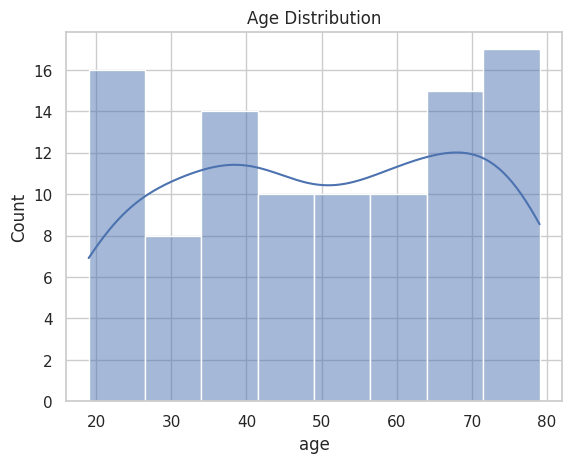

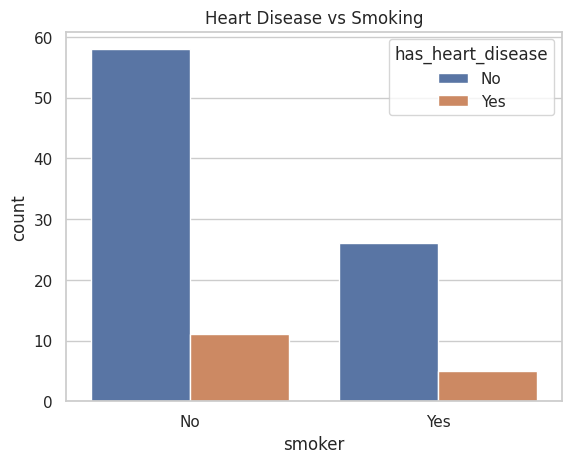

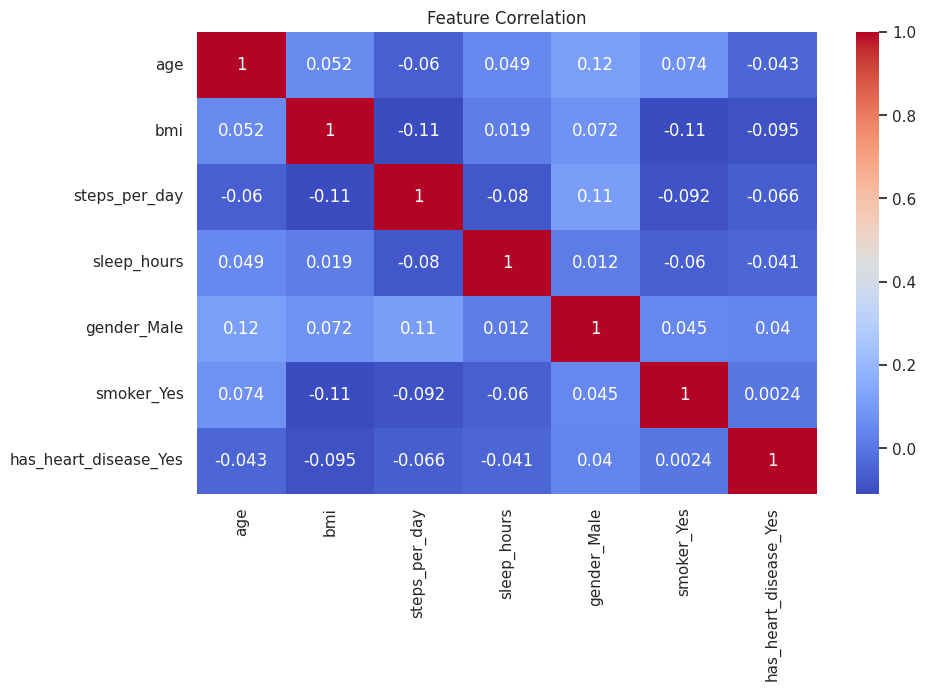

In [ ]:
# New example with Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for cleaner sets
sns.set(style="whitegrid")

# load the dataset
df=pd.read_csv("health_lifestyle.csv")

# print first rows
print(df.head())

# summary info
print(df.info())

# summary stats
print(df.describe())

# check missing values
print(df.isnull().sum())

# Fill missing BMI with mean
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Drop rows where target is missing (optional)
df.dropna(subset=['has_heart_disease'], inplace=True)

df.drop_duplicates(inplace=True)

# visualise the data
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# heart disease vs smoking
sns.countplot(x='smoker', hue='has_heart_disease', data=df)
plt.title('Heart Disease vs Smoking')
plt.show()

# Convert categorical to numerical for correlation
df_encoded = pd.get_dummies(df, drop_first=True)

plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

df['smoker'] = df['smoker'].map({'Yes': 1, 'No': 0})
df['has_heart_disease'] = df['has_heart_disease'].map({'Yes': 1, 'No': 0})

# Active lifestyle flag
df['is_active'] = df['steps_per_day'] > 7000





In [ ]:
# Creating a model for the above dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Select features
features = ['age', 'bmi', 'steps_per_day', 'sleep_hours', 'smoker']
X = df[features]
y = df['has_heart_disease']

# train the model
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))




Accuracy: 0.9

Confusion Matrix:
 [[18  0]
 [ 2  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Slope (m): 6.857142857142858
Intercept (b): 42.66666666666667
Predicted score for 3.5 hours of study: 66.67


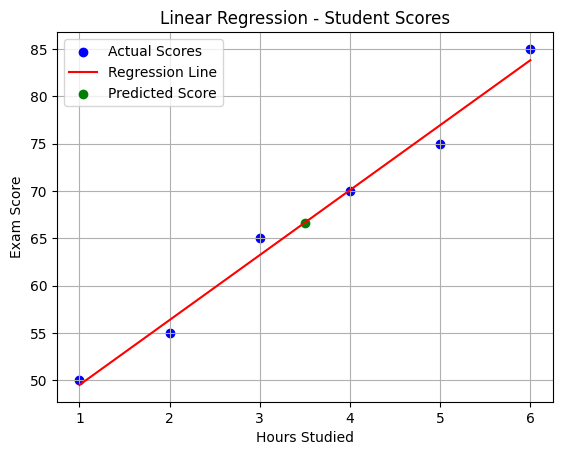

In [ ]:
# 4th day code practise
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 2: Prepare the data
X = np.array([[1], [2], [3], [4], [5], [6]])  # Hours studied
y = np.array([50, 55, 65, 70, 75, 85])       # Scores

# Step 3: Create and train the model
model = LinearRegression()
model.fit(X, y)

# Step 4: Print model parameters
print("Slope (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)

# Step 5: Predict for a new value
hours = 3.5
predicted_score = model.predict([[hours]])
print(f"Predicted score for {hours} hours of study: {predicted_score[0]:.2f}")

# Step 6: Visualize the data and the regression line
plt.scatter(X, y, color='blue', label='Actual Scores')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.scatter([[hours]], predicted_score, color='green', label='Predicted Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Linear Regression - Student Scores')
plt.legend()
plt.grid(True)
plt.show()


Mean squared error (MSE): 4061.8259284949268
R² score: 0.23335039815872138
Slope: 998.5776891375598
Intercept: 152.00335421448167


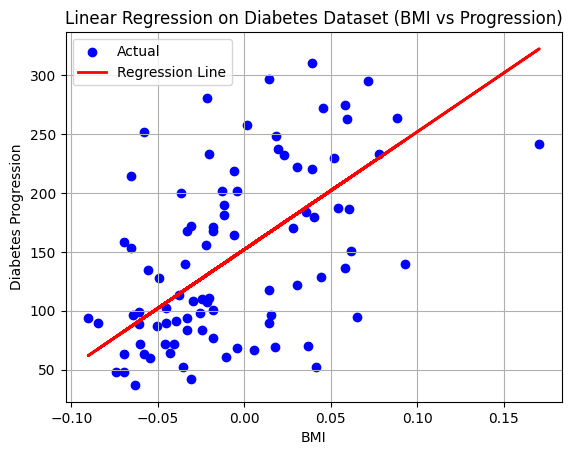

In [ ]:
# predicting the diabetes based on the data
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the dataset
diabetes = load_diabetes()
X = diabetes.data[:, np.newaxis, 2]  # Using only the BMI feature
y = diabetes.target

# Step 3: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict on test set
y_pred = model.predict(X_test)

# Step 6: Print evaluation metrics
print("Mean squared error (MSE):", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))
print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)

# Step 7: Visualize
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("BMI")
plt.ylabel("Diabetes Progression")
plt.title("Linear Regression on Diabetes Dataset (BMI vs Progression)")
plt.legend()
plt.grid(True)
plt.show()


Accuracy: 0.7467532467532467
Confusion Matrix:
 [[78 21]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

ROC AUC Score: 0.8128558310376492


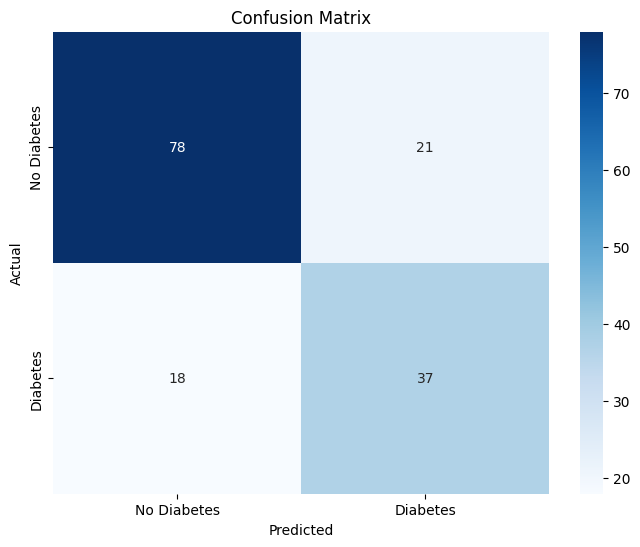

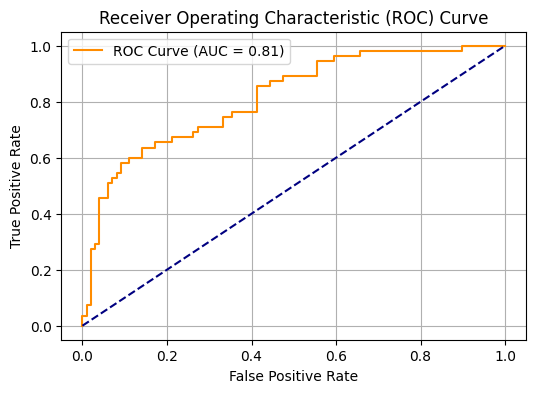

In [ ]:
# classify from the medical data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
    "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]
df = pd.read_csv(url, header=None, names=column_names)

# Step 2: Split features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 5: Predictions and evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

# plot confusion matrix as heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# roc curve
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

# improving the accuracy
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
# comparing all the classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    print(f"{name} - Accuracy: {acc:.2f}, AUC: {auc_score:.2f}")


Logistic Regression - Accuracy: 0.75, AUC: 0.81
Random Forest - Accuracy: 0.73, AUC: 0.82
SVM - Accuracy: 0.77, AUC: 0.81
KNN - Accuracy: 0.66, AUC: 0.72


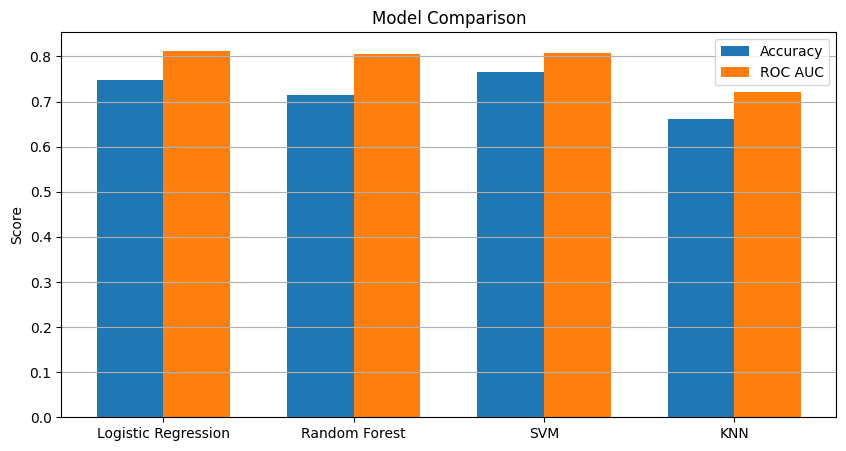

In [ ]:
# Same comparison with visualisation
import matplotlib.pyplot as plt

model_names = []
accuracies = []
auc_scores = []

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    model_names.append(name)
    accuracies.append(accuracy_score(y_test, y_pred))
    auc_scores.append(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

# Plotting
x = np.arange(len(model_names))
width = 0.35

plt.figure(figsize=(10,5))
plt.bar(x - width/2, accuracies, width, label='Accuracy')
plt.bar(x + width/2, auc_scores, width, label='ROC AUC')
plt.xticks(x, model_names)
plt.ylabel("Score")
plt.title("Model Comparison")
plt.legend()
plt.grid(axis='y')
plt.show()


Logistic Regression - CV Accuracy: 0.775 ± 0.015
Random Forest - CV Accuracy: 0.762 ± 0.016
SVM - CV Accuracy: 0.760 ± 0.017
KNN - CV Accuracy: 0.729 ± 0.024
Best Params: {'C': 10}
Logistic Regression - Accuracy: 0.75, AUC: 0.81
Random Forest - Accuracy: 0.73, AUC: 0.81
SVM - Accuracy: 0.73, AUC: 0.80
KNN - Accuracy: 0.69, AUC: 0.76
Logistic Regression - CV Accuracy: 0.775 ± 0.015
Random Forest - CV Accuracy: 0.762 ± 0.030
SVM - CV Accuracy: 0.760 ± 0.017
KNN - CV Accuracy: 0.729 ± 0.024
Original shape: (768, 8)
After SMOTE: (1000, 8)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

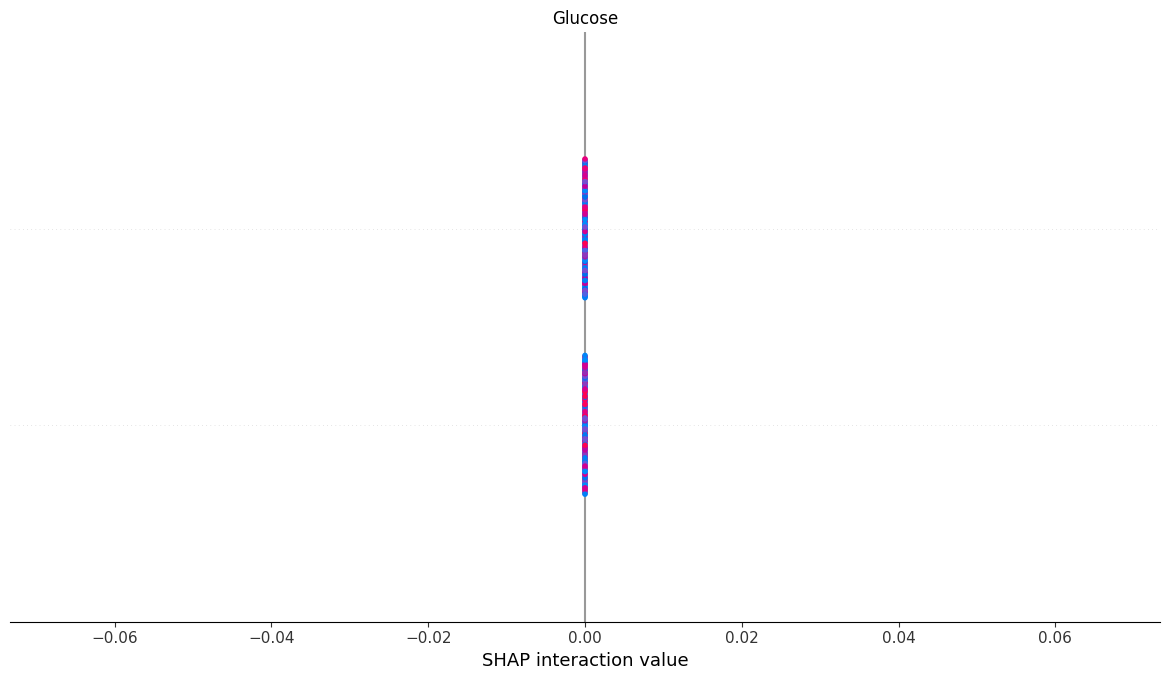

In [ ]:
# cross validation for robust evaluation

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, clf in models.items():
    scores = cross_val_score(clf, X_scaled, y, cv=cv, scoring='accuracy')
    print(f"{name} - CV Accuracy: {scores.mean():.3f} ± {scores.std():.3f}")

# grid search
params = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid=params, cv=5)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)

# compare the selections
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    print(f"{name} - Accuracy: {acc:.2f}, AUC: {auc_score:.2f}")

# cross validation for robust
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, clf in models.items():
    scores = cross_val_score(clf, X_scaled, y, cv=cv, scoring='accuracy')
    print(f"{name} - CV Accuracy: {scores.mean():.3f} ± {scores.std():.3f}")

model = LogisticRegression(class_weight='balanced', max_iter=1000)

# another one
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("Original shape:", X_scaled.shape)
print("After SMOTE:", X_resampled.shape)

# model pipeline and export
from sklearn.pipeline import Pipeline
from joblib import dump

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

pipeline.fit(X_train, y_train)
dump(pipeline, 'diabetes_model.joblib')  # Save model

# explain the predictions
# explain the predictions
import shap

# Ensure X_test is preprocessed the same way as the training data
# Assuming you scaled the training data before fitting the model
X_test_scaled = scaler.transform(X_test)  # Scale X_test

# Use the scaled data for the explainer
explainer = shap.Explainer(models["Random Forest"], X_test_scaled)
shap_values = explainer(X_test_scaled)

shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)





In [ ]:
# Day 4 of learning
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

df = pd.DataFrame({
    'city': ['Paris', 'London', 'Berlin', 'Berlin'],
    'temp': [21, 20, 19, None],
    'wind': [5, 7, 6, 6]
})

# Fill missing values
df['temp'].fillna(df['temp'].mean(), inplace=True)

# Encode 'city'
label_encoder = LabelEncoder()
df['city_encoded'] = label_encoder.fit_transform(df['city'])

# Feature scaling
scaler = StandardScaler()
df[['temp_scaled', 'wind_scaled']] = scaler.fit_transform(df[['temp', 'wind']])

df['temp_bucket'] = pd.cut(df['temp'], bins=[0, 18, 22, 100], labels=['Cold', 'Moderate', 'Hot'])

print(df)

# add new column temp/wind
df['temp_wind_ratio'] = df['temp'] / df['wind']

     city  temp  wind  city_encoded  temp_scaled  wind_scaled temp_bucket
0   Paris  21.0     5             2     1.414214    -1.414214    Moderate
1  London  20.0     7             1     0.000000     1.414214    Moderate
2  Berlin  19.0     6             0    -1.414214     0.000000    Moderate
3  Berlin  20.0     6             0     0.000000     0.000000    Moderate


<ipython-input-2-169738ac1aac>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['temp'].fillna(df['temp'].mean(), inplace=True)


   age    income         city   job_type  credit_score
0   56   22695.0  Los Angeles       Tech         560.0
1   46   68190.0     New York    Finance         637.0
2   32   25258.0  Los Angeles       Tech         666.0
3   60  107538.0      Houston  Education           NaN
4   25   59504.0      Houston    Finance         643.0
   age    income         city   job_type  credit_score  city_encoded  \
0   56   22695.0  Los Angeles       Tech    560.000000             2   
1   46   68190.0     New York    Finance    637.000000             3   
2   32   25258.0  Los Angeles       Tech    666.000000             2   
3   60  107538.0      Houston  Education    644.688889             1   
4   25   59504.0      Houston    Finance    643.000000             1   

   job_type_encoded  age_scaled  income_scaled  credit_score_scaled  \
0                 3    1.086153      -1.628558            -1.672683   
1                 1    0.367798      -0.048556            -0.151863   
2                 3   -0

<ipython-input-11-54bc95d1161d>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['income'].fillna(df['income'].mean(), inplace=True)
<ipython-input-11-54bc95d1161d>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

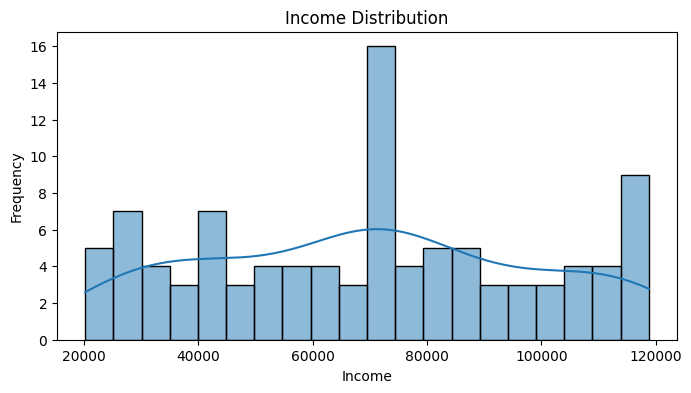

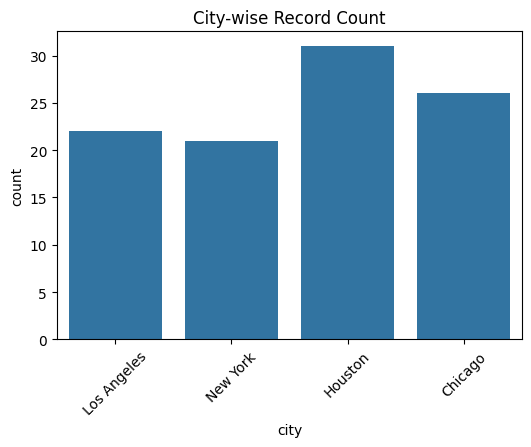

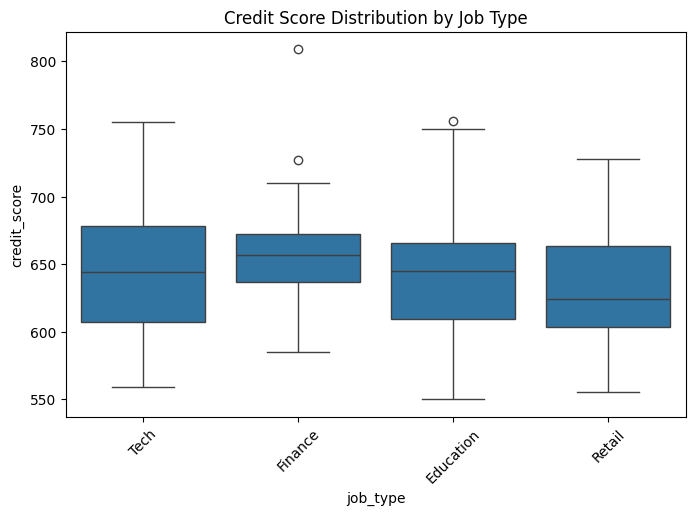

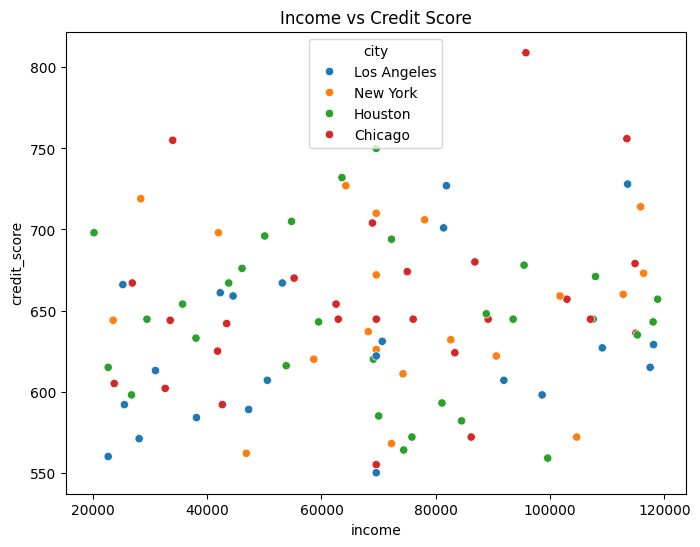

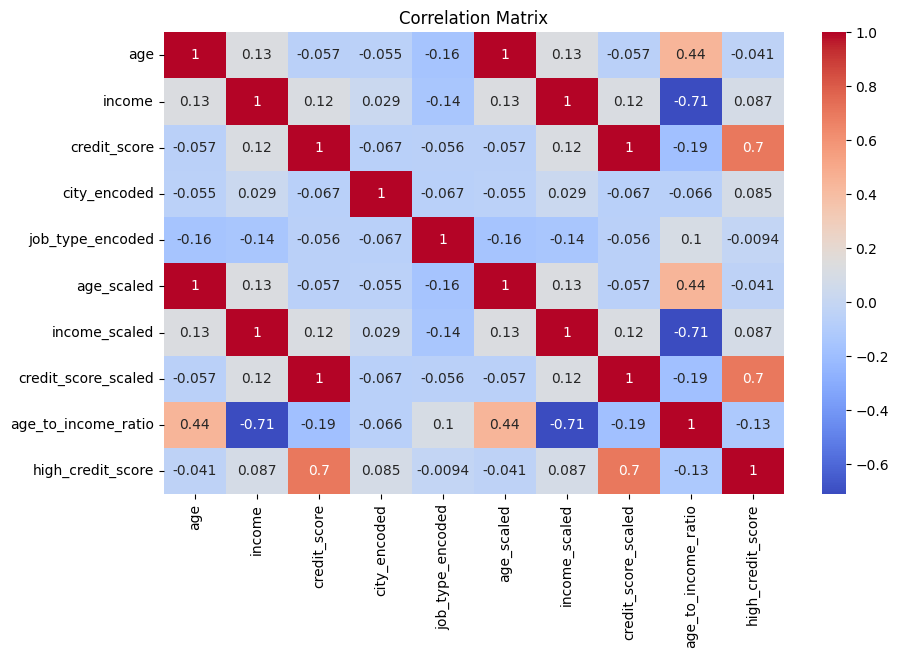

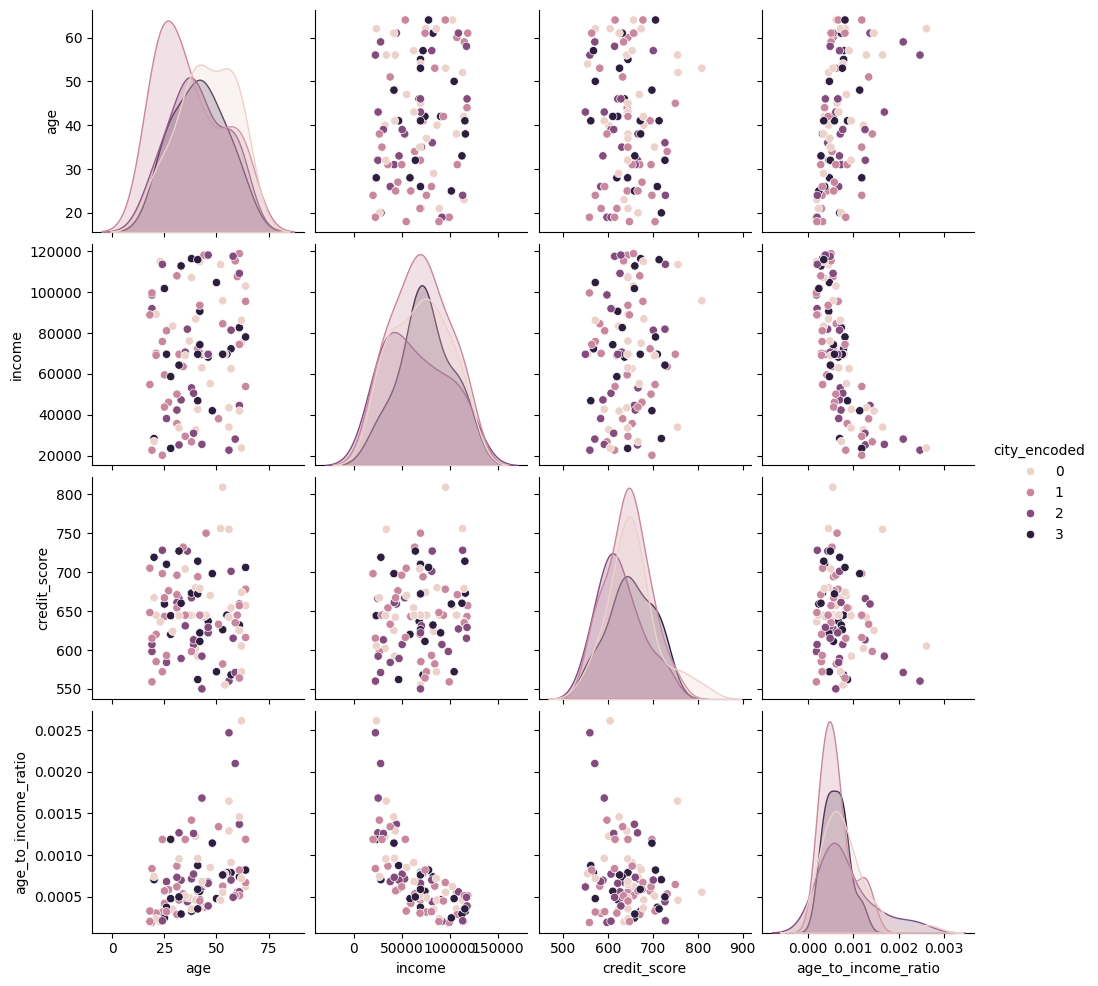

Accuracy: 0.95


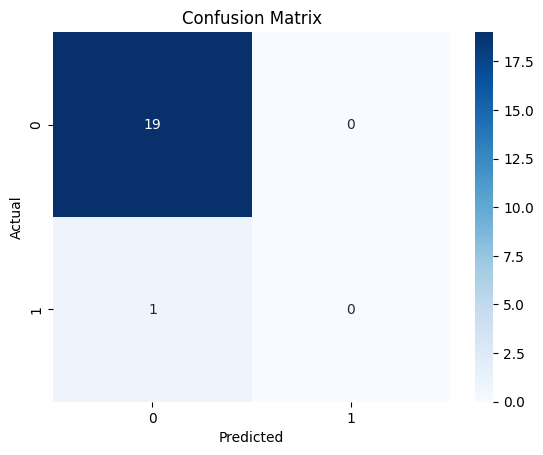

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('sample_data/fresh_ml_dataset_day4.csv')

# Display first few rows
print(df.head())

# Fill missing values
df['income'].fillna(df['income'].mean(), inplace=True)
df['credit_score'].fillna(df['credit_score'].mean(), inplace=True)

# Drop rows with critical missing values (if any)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Encode categorical columns
label_encoder = LabelEncoder()
df['city_encoded'] = label_encoder.fit_transform(df['city'])
df['job_type_encoded'] = label_encoder.fit_transform(df['job_type'])

# Feature scaling
scaler = StandardScaler()
df[['age_scaled', 'income_scaled', 'credit_score_scaled']] = scaler.fit_transform(
    df[['age', 'income', 'credit_score']]
)

# Feature engineering
df['age_to_income_ratio'] = df['age'] / df['income']
df['high_credit_score'] = df['credit_score'] > 700
df['income_bucket'] = pd.cut(
    df['income'],
    bins=[0, 30000, 60000, 90000, 120000],
    labels=['Low', 'Medium', 'High', 'Very High']
)

# Final preview
print(df.head())

# visualization

plt.figure(figsize=(8, 4))
sns.histplot(df['income'], kde=True, bins=20)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='city', data=df)
plt.title('City-wise Record Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='job_type', y='credit_score', data=df)
plt.title('Credit Score Distribution by Job Type')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='income', y='credit_score', hue='city')
plt.title('Income vs Credit Score')
plt.show()


plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


sns.pairplot(df[['age', 'income', 'credit_score', 'age_to_income_ratio', 'city_encoded']], hue='city_encoded')
plt.show()



# logical regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df['target'] = (df['credit_score'] > 700).astype(int)

# split the data
features = ['age_scaled', 'income_scaled', 'city_encoded', 'job_type_encoded']
X = df[features]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

# visualise
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()








In [ ]:
# Another example goes here on regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# load and inspect the data
df = pd.read_csv('sample_data/bank_customers_dataset.csv')
print(df.head())

# Encode categorical columns
label_encoder = LabelEncoder()
df['city_encoded'] = label_encoder.fit_transform(df['city'])
df['job_type_encoded'] = label_encoder.fit_transform(df['job_type'])

# Scale numerical features
scaler = StandardScaler()
df[['age_scaled', 'income_scaled', 'credit_score_scaled', 'years_scaled']] = scaler.fit_transform(
    df[['age', 'income', 'credit_score', 'years_with_bank']]
)

# Features for both models
X = df[['age_scaled', 'income_scaled', 'credit_score_scaled', 'years_scaled', 'city_encoded', 'job_type_encoded']]

# Targets
y_linear = df['customer_lifetime_value']
y_logistic = df['defaulted_loan']

# Splits
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X, y_linear, test_size=0.2, random_state=42)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_logistic, test_size=0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train_lin, y_train_lin)
y_pred_lin = lin_model.predict(X_test_lin)

# Evaluation
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test_lin, y_pred_lin))
print("R² Score:", r2_score(y_test_lin, y_pred_lin))

# logistic regression
log_model = LogisticRegression()
log_model.fit(X_train_log, y_train_log)
y_pred_log = log_model.predict(X_test_log)

# Evaluation
print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test_log, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test_log, y_pred_log))
print("Classification Report:\n", classification_report(y_test_log, y_pred_log))


# Visualizations
# Residual Plot for Linear Regression
residuals = y_test_lin - y_pred_lin
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='skyblue')
plt.title('Residuals of Linear Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.savefig("linear_regression_residuals.png")
plt.close()

# Confusion Matrix Heatmap for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_log, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.savefig("logistic_regression_confusion_matrix.png")
plt.close()

ecision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train_log)
y_pred_dt = decision_tree_model.predict(X_test_log)

print("\nDecision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test_log, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test_log, y_pred_dt))

# compare both models accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test_log, y_pred_log))

# visualise
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test_log, y_pred_log), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.savefig("logistic_regression_confusion_matrix.png")
plt.close()

   age  income  credit_score  years_with_bank         city   job_type  \
0   56   83053           752               12  Los Angeles     Retail   
1   69   46959           815                7     New York    Finance   
2   46   30530           846                9     New York    Finance   
3   32  119856           491                8      Houston    Finance   
4   60  144101           348               17      Houston  Education   

   customer_lifetime_value  defaulted_loan  
0                 42070.68               0  
1                 40453.87               0  
2                 18804.27               0  
3                 57976.99               1  
4                 80854.56               1  
Linear Regression:
MSE: 114286997.15424809
R² Score: 0.7841048508565756

Logistic Regression:
Accuracy: 0.95
Confusion Matrix:
 [[14  2]
 [ 0 24]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           

MSE: 51262738.310713366
R² score: 0.4782298684566908


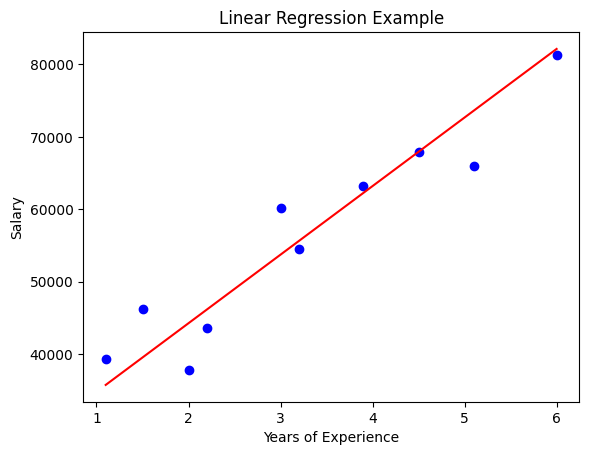

In [ ]:
# Day 5 ML learning
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Sample data
data = {
    'YearsExperience': [1.1, 1.5, 2.0, 2.2, 3.0, 3.2, 3.9, 4.5, 5.1, 6.0],
    'Salary': [39343, 46205, 37731, 43525, 60150, 54445, 63218, 67938, 66029, 81363]
}
df = pd.DataFrame(data)

# Split data
X = df[['YearsExperience']]
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))

# Plot
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression Example")
plt.show()


In [ ]:
# Multiple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 0.5558915986952444
R²: 0.5757877060324508


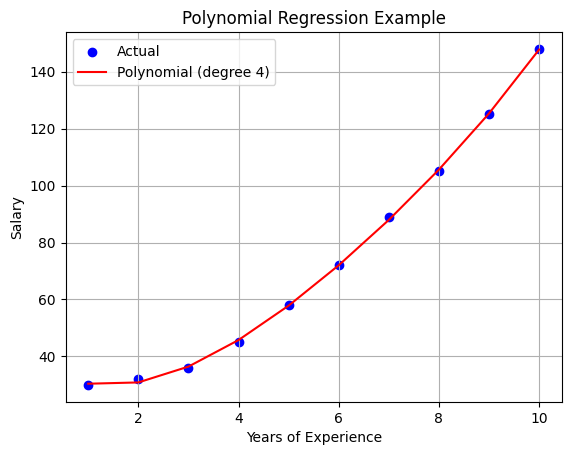

In [ ]:
# polynomial example
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Simulated non-linear dataset
X = np.arange(1, 11).reshape(-1, 1)
y = np.array([30, 32, 36, 45, 58, 72, 89, 105, 125, 148])  # Grows faster over time

# Create polynomial regression model
degree = 4
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X, y)

# Predict
y_pred = poly_model.predict(X)

# Plotting
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label=f'Polynomial (degree {degree})')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Polynomial Regression Example")
plt.legend()
plt.grid(True)
plt.show()





R² scores from each fold: [0.57578771 0.61374822 0.60856043 0.62126494 0.5875292 ]
Average R² score: 0.6013781013684625


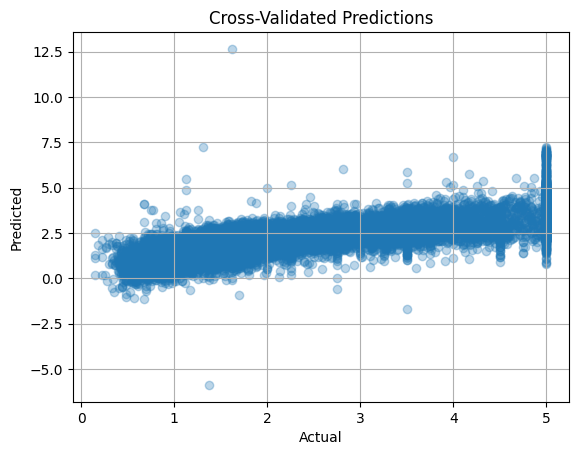

In [ ]:
# model evaluation
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Load data
data = fetch_california_housing()
X = data.data
y = data.target

# Model
model = LinearRegression()

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

# Results
print("R² scores from each fold:", scores)
print("Average R² score:", np.mean(scores))

from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

y_pred = cross_val_predict(model, X, y, cv=5)

plt.scatter(y, y_pred, alpha=0.3)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Cross-Validated Predictions")
plt.grid(True)
plt.show()

# compare models without cross-validations




['malignant' 'benign']
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



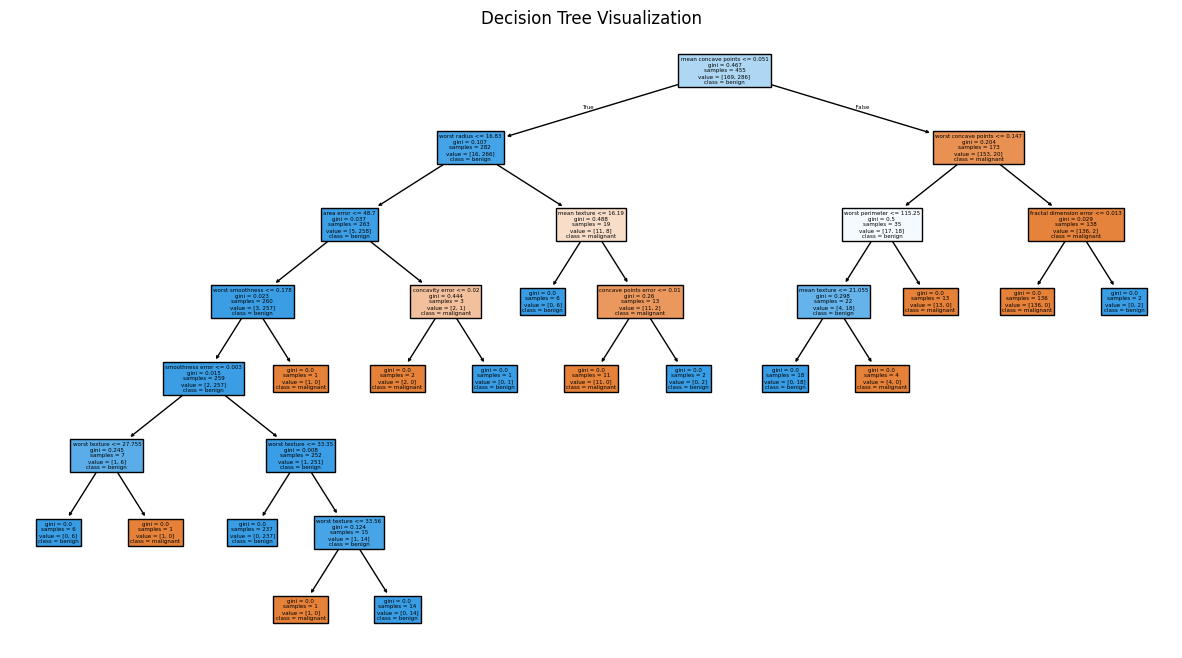

In [ ]:
# Day 8 ML practise
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Load dataset
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='benign')
#X, y = data.data, data.target

print(data.target_names)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
dt_model = DecisionTreeClassifier(max_depth=16, random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate
y_pred = dt_model.predict(X_test)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(15, 8))
plot_tree(dt_model, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Decision Tree Visualization")
plt.show()


In [ ]:
# random forests
from sklearn.ensemble import RandomForestClassifier

# Train random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
 [[41  2]
 [ 3 68]]
RBF Kernel Accuracy: 0.9824561403508771


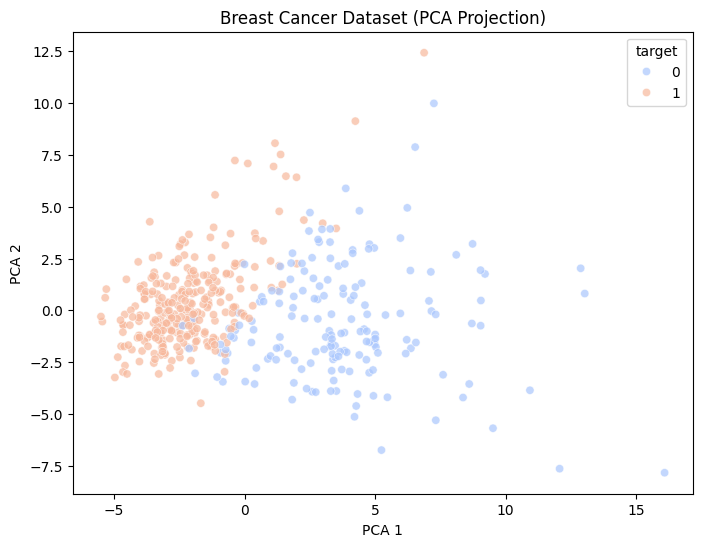

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9736263736263737
Test Accuracy with Best Params: 0.9824561403508771

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



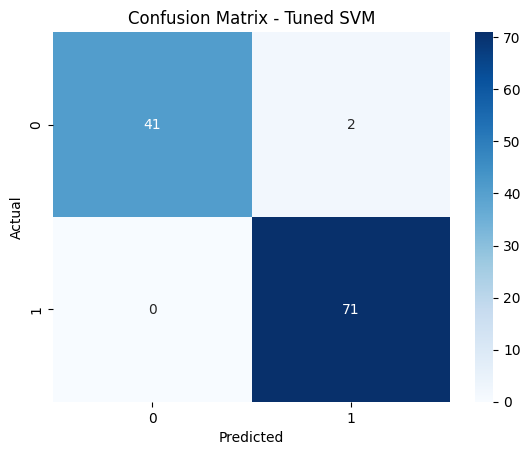

In [ ]:
# Day 9 support vector machines
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
data = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Check first few rows
df.head()

# Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train SVM with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_linear.predict(X_test_scaled)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# RBF kernel SVM
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)

# Evaluate
y_pred_rbf = svm_rbf.predict(X_test_scaled)
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette='coolwarm', alpha=0.7)
plt.title('Breast Cancer Dataset (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# Parameters to try
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Initialize GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

# Evaluate on test set
y_pred_best = grid.predict(X_test_scaled)
print("Test Accuracy with Best Params:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned SVM')
plt.show()




0      1
1      2
2      2
3      2
4      1
      ..
145    0
146    3
147    0
148    0
149    0
Name: cluster, Length: 150, dtype: int32


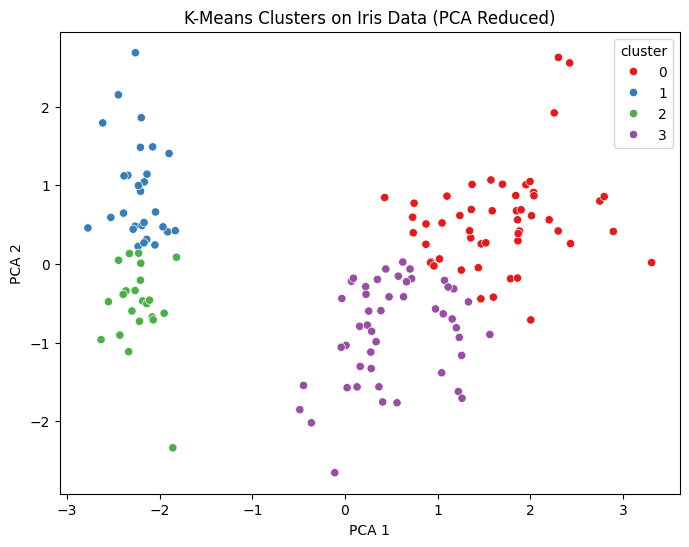

0.4945348085299907

In [ ]:
# unsupervised learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load Iris data
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Add predicted cluster labels
X['cluster'] = kmeans.labels_

print(X['cluster'])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=X['cluster'], palette='Set1')
plt.title("K-Means Clusters on Iris Data (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

from sklearn.metrics import adjusted_rand_score

# Note: In real unsupervised tasks, you won't have y
adjusted_rand_score(data.target, kmeans.labels_)



   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2  Female   21                  15                      81
2           3    Male   20                  16                       6
3           4  Female   23                  16                      77
4           5    Male   31                  17                      40
0      1
1      0
2      1
3      0
4      1
      ..
195    0
196    1
197    0
198    1
199    0
Name: Gender, Length: 200, dtype: int64


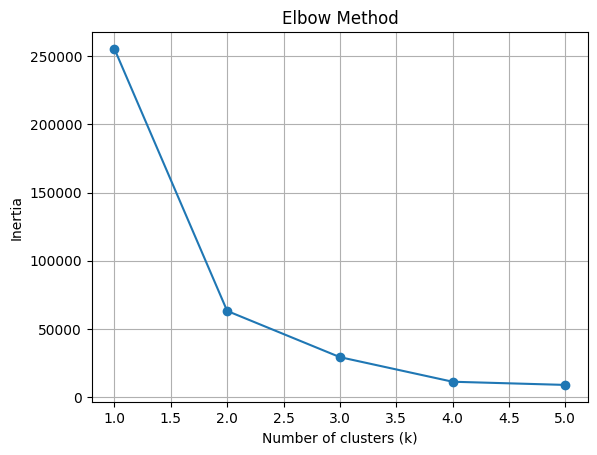

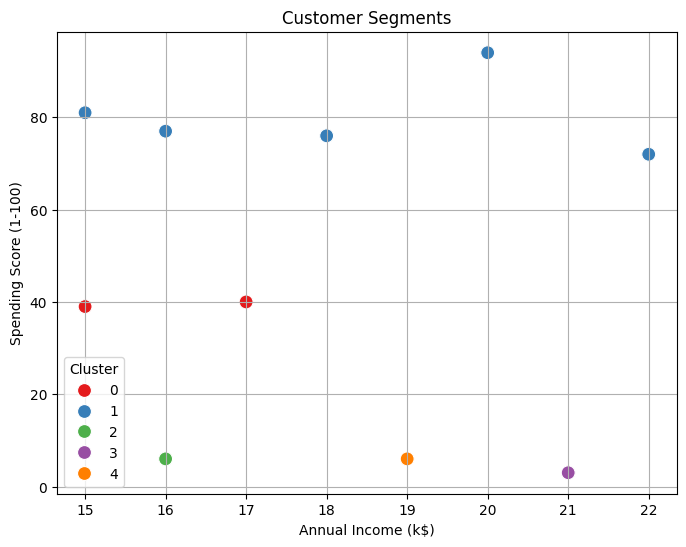

In [ ]:
# 10th day of ML refreshing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("mall_customers.csv")

print(df.head())


# Drop CustomerID
df = df.drop('CustomerID', axis=1)

# Encode Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male = 1, Female = 0

print(df['Gender'])

# Select features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

inertia = []
k_range = range(1, 6)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Apply K-Means with optimal k
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    s=100
)
plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()



   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2  Female   21                  15                      81
2           3    Male   20                  16                       6
3           4  Female   23                  16                      77
4           5    Male   31                  17                      40
0      1
1      0
2      1
3      0
4      1
      ..
195    0
196    1
197    0
198    1
199    0
Name: Gender, Length: 200, dtype: int64


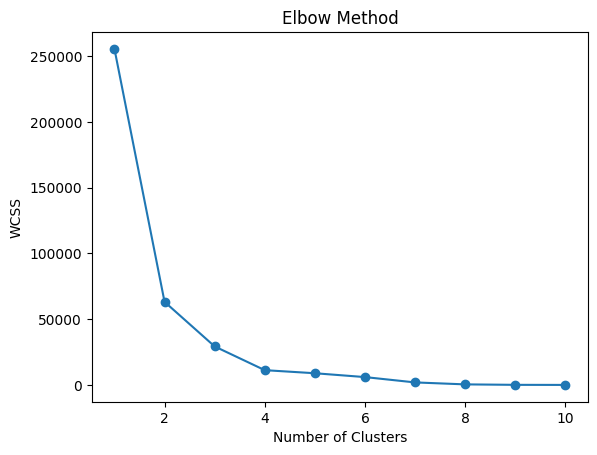

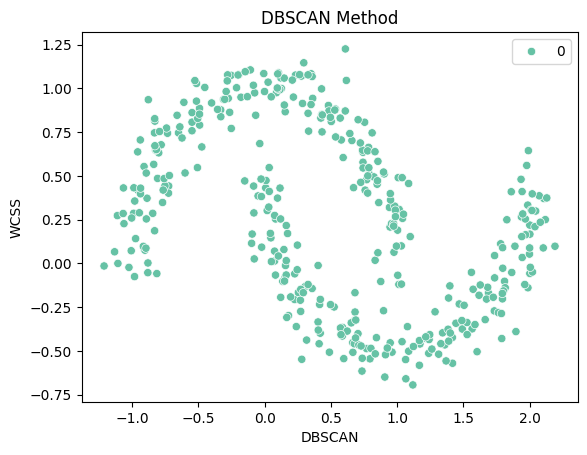

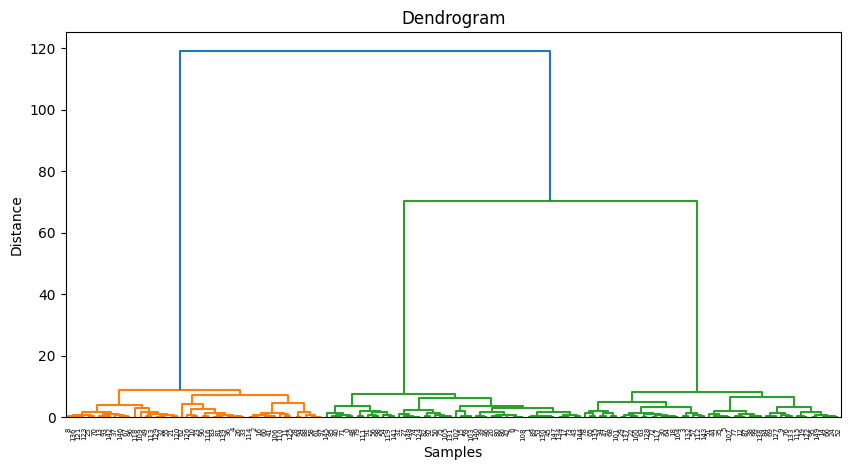

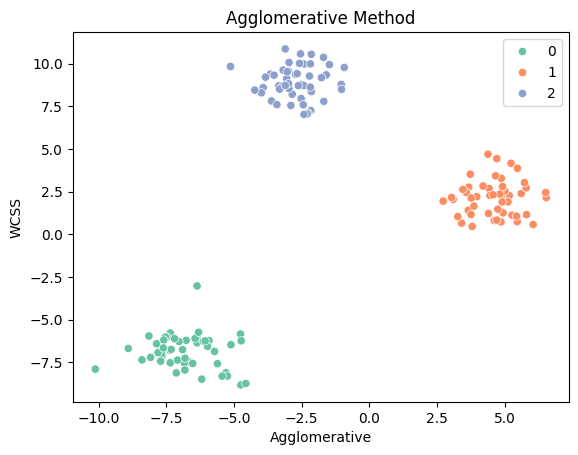

In [ ]:
# Day 11 of learning
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("mall_customers.csv")

print(df.head())


# Drop CustomerID
df = df.drop('CustomerID', axis=1)

# Encode Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male = 1, Female = 0

print(df['Gender'])

# Select features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # assuming X is your feature matrix
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import seaborn as sns

X, _ = make_moons(n_samples=400, noise=0.1)

db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, palette='Set2')
plt.xlabel('DBSCAN')
plt.ylabel('WCSS')
plt.title('DBSCAN Method')
plt.show()

# hierarchial
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=150, centers=3, random_state=42)

linked = linkage(X, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, palette='Set2')
plt.xlabel('Agglomerative')
plt.ylabel('WCSS')
plt.title('Agglomerative Method')
plt.show()



   Feature_1  Feature_2
0  -7.338988  -7.729954
1  -7.740041  -7.264665
2  -1.686653   7.793442
3   4.422198   3.071947
4  -8.917752  -7.888196


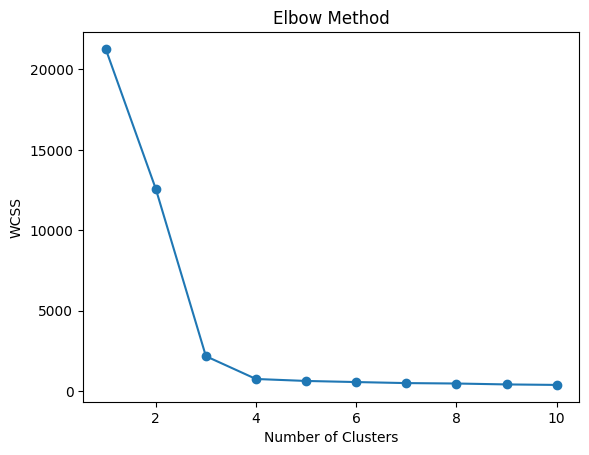

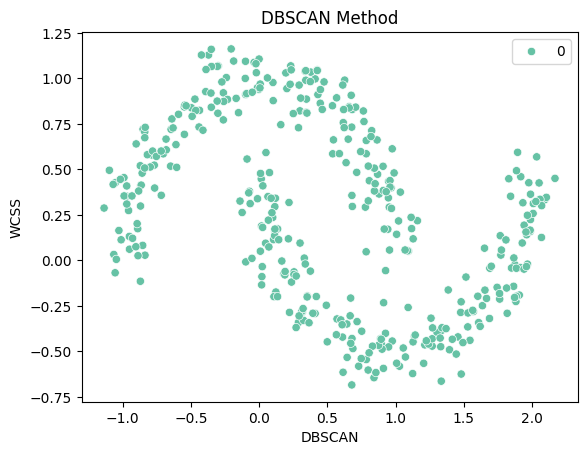

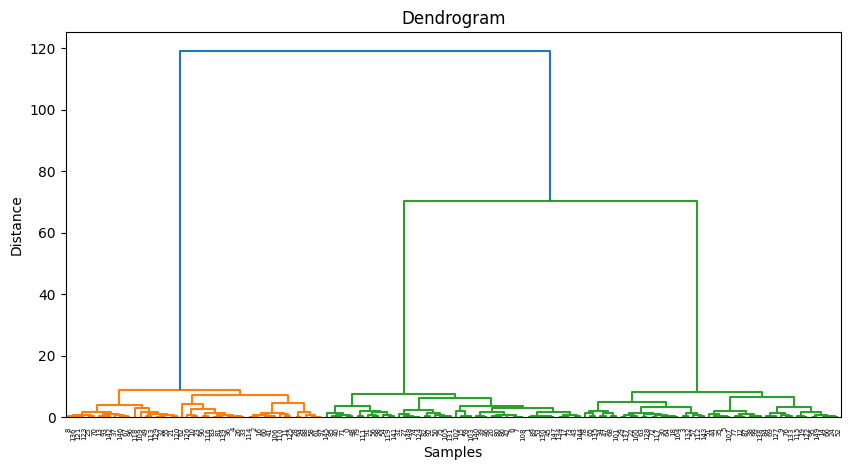

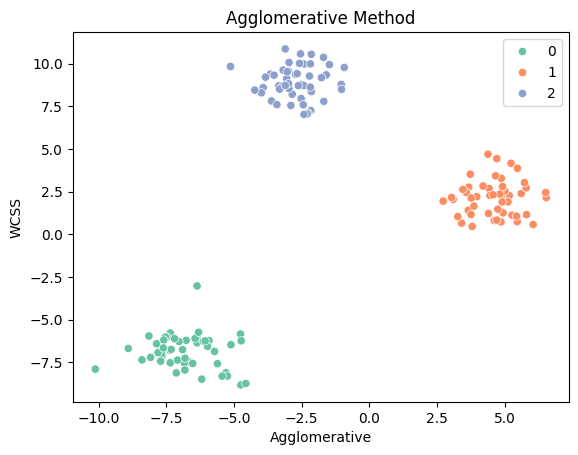

In [ ]:
# another example of clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("clustering_practice_dataset.csv")

print(df.head())

# Encode Gender
le = LabelEncoder()

# Select features for clustering
X = df[['Feature_1', 'Feature_2']]

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # assuming X is your feature matrix
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import seaborn as sns

X, _ = make_moons(n_samples=400, noise=0.1)

db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, palette='Set2')
plt.xlabel('DBSCAN')
plt.ylabel('WCSS')
plt.title('DBSCAN Method')
plt.show()

# hierarchial
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=150, centers=3, random_state=42)

linked = linkage(X, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, palette='Set2')
plt.xlabel('Agglomerative')
plt.ylabel('WCSS')
plt.title('Agglomerative Method')
plt.show()

In [ ]:
# Day 12 of ML practise
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load dataset
df = pd.read_csv("neural_network_custom_dataset.csv")

# Separate features and target
X = df.drop("label", axis=1)
y = df["label"]

# Encode target labels if categorical
if y.dtype == "object":
    le = LabelEncoder()
    y = le.fit_transform(y)

# Check number of classes
num_classes = len(np.unique(y))
if num_classes > 2:
    y = to_categorical(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build model
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes if num_classes > 2 else 1, activation='softmax' if num_classes > 2 else 'sigmoid'))

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nModel Accuracy: {accuracy:.4f}")


KeyError: "['label'] not found in axis"

In [ ]:
# Day 12 of ML practise
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load dataset
df = pd.read_csv("neural_network_custom_dataset.csv")

# Check the column names in your DataFrame
print(df.columns)

# Assuming your target variable column is named 'Label' (case-sensitive)
# Separate features and target
X = df.drop("Target", axis=1)  # Replace 'Label' with the actual target column name if different
y = df["Target"]  # Replace 'Label' with the actual target column name if different


# Encode target labels if categorical
if y.dtype == "object":
    le = LabelEncoder()
    y = le.fit_transform(y)

# Check number of classes
num_classes = len(np.unique(y))
if num_classes > 2:
    y = to_categorical(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build model
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes if num_classes > 2 else 1, activation='softmax' if num_classes > 2 else 'sigmoid'))

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nModel Accuracy: {accuracy:.4f}")



Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
       'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15',
       'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20',
       'Target'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.6409 - loss: 0.6579 - val_accuracy: 0.7850 - val_loss: 0.5386
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8014 - loss: 0.5019 - val_accuracy: 0.8550 - val_loss: 0.4242
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8476 - loss: 0.3896 - val_accuracy: 0.8600 - val_loss: 0.3417
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8765 - loss: 0.3095 - val_accuracy: 0.8700 - val_loss: 0.2849
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9207 - loss: 0.2571 - val_accuracy: 0.8950 - val_loss: 0.2528
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9348 - loss: 0.2323 - val_accuracy: 0.8950 - val_loss: 0.2320
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9409 - loss: 0.2014 - val_accuracy: 0.9200 - val_loss: 0.2102
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9454 - loss: 0.1785 - val_accuracy: 0.9200 - val_loss

In [ ]:
# Day 13 of ML practise
from tensorflow.keras.layers import Dropout

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load dataset
df = pd.read_csv("neural_network_custom_dataset.csv")

# Check the column names in your DataFrame
print(df.columns)

# Assuming your target variable column is named 'Label' (case-sensitive)
# Separate features and target
X = df.drop("Target", axis=1)  # Replace 'Label' with the actual target column name if different
y = df["Target"]  # Replace 'Label' with the actual target column name if different


# Encode target labels if categorical
if y.dtype == "object":
    le = LabelEncoder()
    y = le.fit_transform(y)

# Check number of classes
num_classes = len(np.unique(y))
if num_classes > 2:
    y = to_categorical(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build model
model = Sequential([
    Dense(64, activation='relu', input_dim=X.shape[1]),
    Dropout(0.3),  # 30% dropout
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(num_classes if num_classes > 2 else 1, activation='softmax' if num_classes > 2 else 'sigmoid')
])

# regularizers
from tensorflow.keras import regularizers

model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_dim=X.shape[1]),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(num_classes if num_classes > 2 else 1, activation='softmax' if num_classes > 2 else 'sigmoid')
])



Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
       'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15',
       'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20',
       'Target'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.5159 - loss: 1.0225 - val_accuracy: 0.7850 - val_loss: 0.8452
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7450 - loss: 0.8231 - val_accuracy: 0.8350 - val_loss: 0.7296
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7822 - loss: 0.7450 - val_accuracy: 0.8600 - val_loss: 0.6483
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8060 - loss: 0.6683 - val_accuracy: 0.8700 - val_loss: 0.5897
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8467 - loss: 0.6092 - val_accuracy: 0.8800 - val_loss: 0.5414
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8550 - loss: 0.5662 - val_accuracy: 0.8800 - val_loss: 0.5038
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8606 - loss: 0.5252 - val_accuracy: 0.8750 - val_loss: 0.4697
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8703 - loss: 0.5088 - val_accuracy: 0.8850 - val

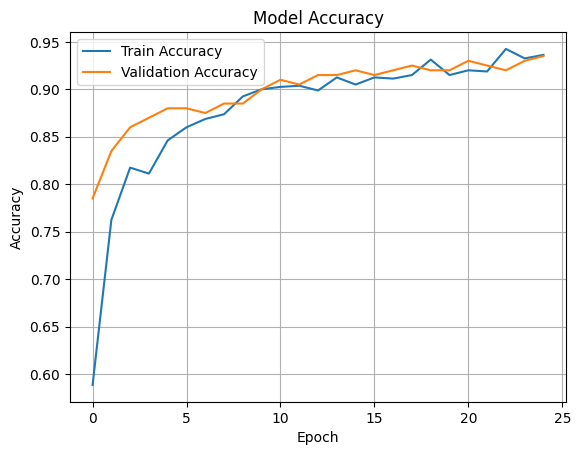

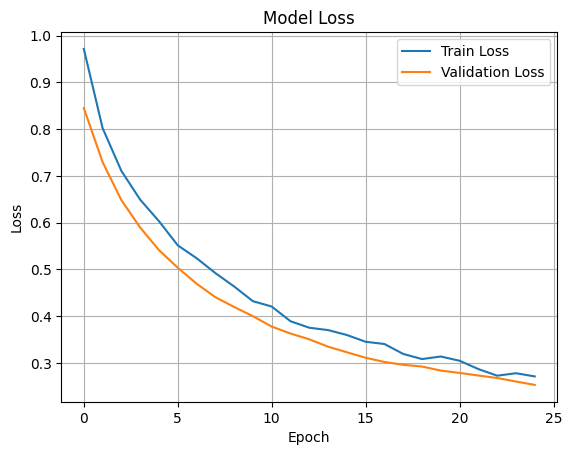

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


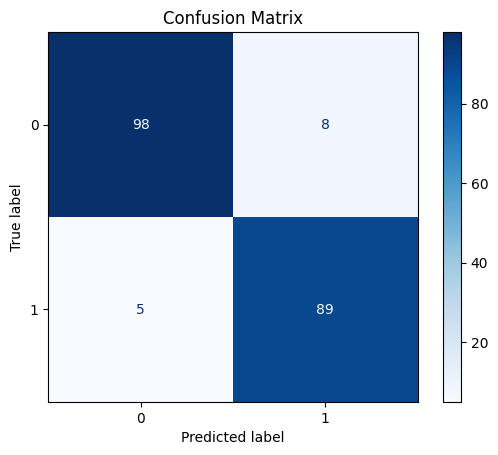

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       106
           1       0.92      0.95      0.93        94

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



In [ ]:
# improved neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("neural_network_custom_dataset.csv")
X = df.drop("Target", axis=1)
y = df["Target"]

# Encode labels
if y.dtype == "object":
    le = LabelEncoder()
    y = le.fit_transform(y)

num_classes = len(np.unique(y))
if num_classes > 2:
    y = to_categorical(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build improved model
model = Sequential([
    Dense(64, activation='tanh', kernel_regularizer=regularizers.l2(0.01), input_dim=X.shape[1]),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(num_classes if num_classes > 2 else 1, activation='softmax' if num_classes > 2 else 'sigmoid')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy',
    metrics=['accuracy']
)

# Train with history tracking
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test), verbose=1)

import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = (
    np.argmax(y_pred, axis=1) if num_classes > 2 else (y_pred > 0.5).astype("int32").flatten()
)
y_true = (
    np.argmax(y_test, axis=1) if num_classes > 2 else y_test
)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))



Shape of features: (569, 30)
Scaled feature sample (first row):
 [ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]
Shape after PCA: (569, 2)


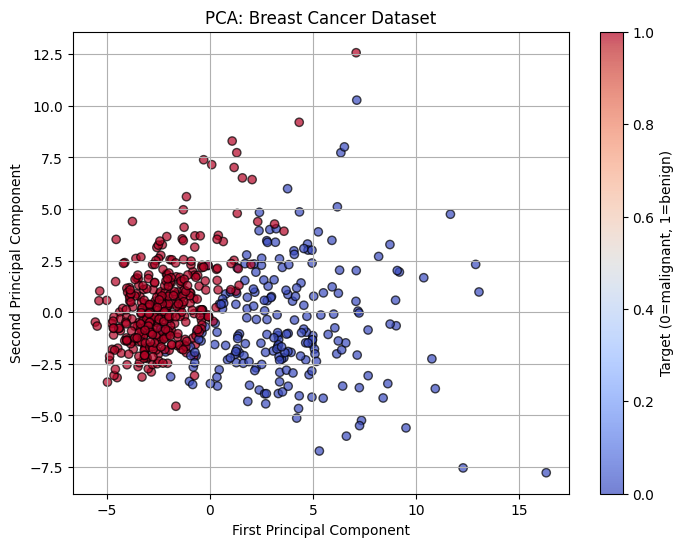

Accuracy with full features (30): 0.9736842105263158
Accuracy with PCA-reduced features (2): 0.9912280701754386


In [ ]:
# Day 14 learning
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Shape of features:", X.shape)
X.head()

from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
X_scaled = scaler.fit_transform(X)

print("Scaled feature sample (first row):\n", X_scaled[0])

from sklearn.decomposition import PCA

# Initialize PCA to reduce to 2 components
pca = PCA(n_components=2)

# Apply PCA
X_pca = pca.fit_transform(X_scaled)

print("Shape after PCA:", X_pca.shape)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: Breast Cancer Dataset')
plt.colorbar(label='Target (0=malignant, 1=benign)')
plt.grid(True)
plt.show()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train-test split (same split for fair comparison)
X_train_full, X_test_full, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize and train
model_full = LogisticRegression(max_iter=1000)
model_full.fit(X_train_full, y_train)

# Predict
y_pred_full = model_full.predict(X_test_full)

# Accuracy
acc_full = accuracy_score(y_test, y_pred_full)
print("Accuracy with full features (30):", acc_full)

# Initialize and train
model_pca = LogisticRegression(max_iter=1000)
model_pca.fit(X_train_pca, y_train)

# Predict
y_pred_pca = model_pca.predict(X_test_pca)

# Accuracy
acc_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy with PCA-reduced features (2):", acc_pca)


Precision: 0.97
Recall: 0.99
F1 Score: 0.98


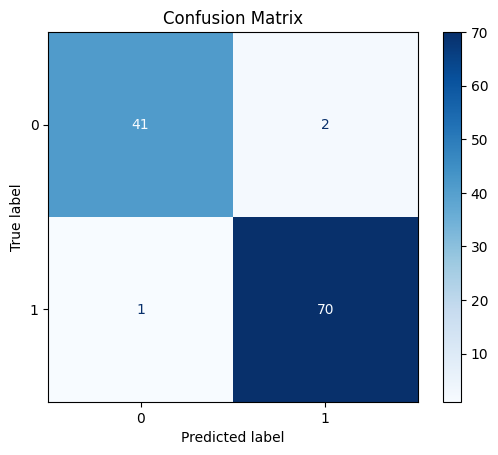

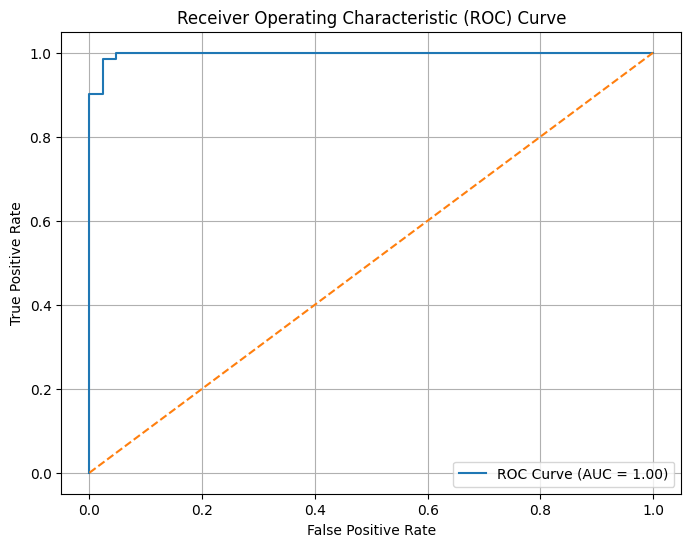

In [ ]:
# day 15 of ML practise
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load and split
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate individual metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# ROC Curve
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()




         Date       Value
0  2023-01-01  100.745071
1  2023-01-02  100.223342
2  2023-01-03  101.832280
3  2023-01-04  103.573844
4  2023-01-05  101.364441


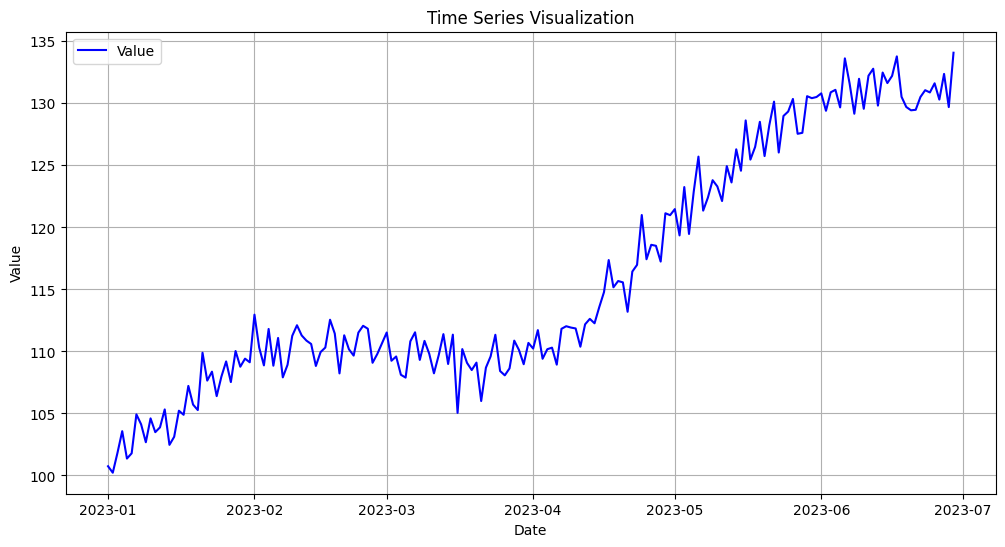

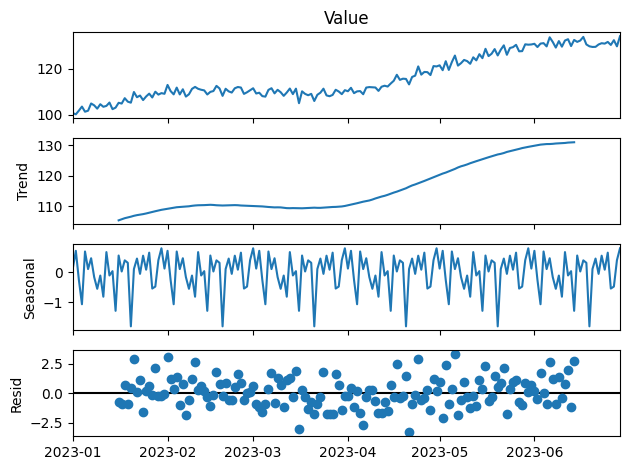

In [ ]:
# day 16 of ML learning
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("time_series_sample.csv")
print(df.head())

# convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# set date column as index
df.set_index('Date', inplace=True)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['Value'], label='Value', color='blue')
plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['Value'], model='additive', period=30)  # period=30 for monthly seasonality

# Plot the decomposition
result.plot()
plt.tight_layout()
plt.show()





In [ ]:
# Arima model install
!pip install statsmodels


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  180
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -348.448
Date:                Mon, 28 Apr 2025   AIC                            702.896
Time:                        19:05:53   BIC                            712.458
Sample:                    01-01-2023   HQIC                           706.773
                         - 06-29-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1794      0.131     -1.374      0.170      -0.435       0.077
ma.L1         -0.5211      0.120     -4.334      0.000      -0.757      -0.285
sigma2         2.8646      0.306      9.350      0.0

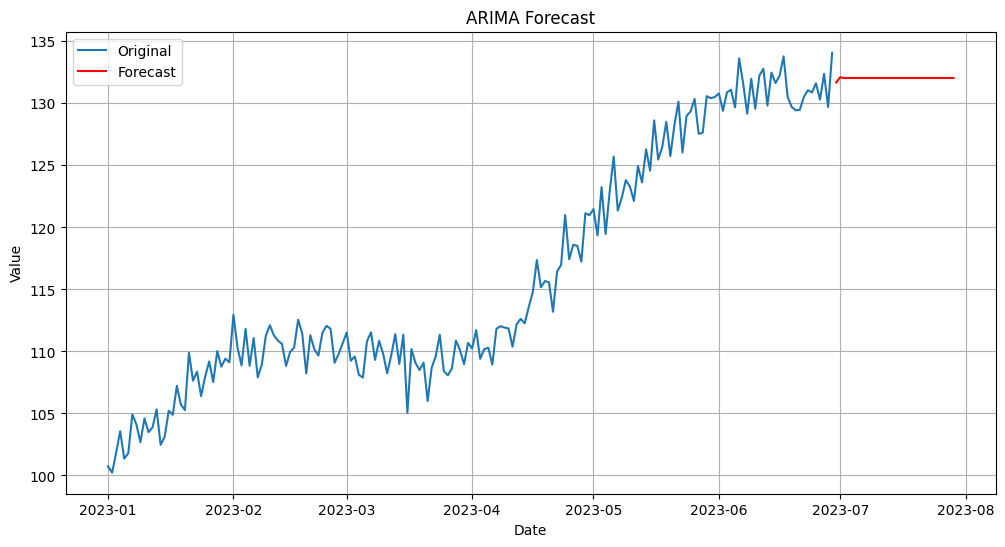

In [ ]:
# example on arima
from statsmodels.tsa.arima.model import ARIMA

# Build ARIMA model (p=1, d=1, q=1) — basic start
model = ARIMA(df['Value'], order=(1,1,1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Value'], label='Original')
plt.plot(pd.date_range(df.index[-1]+pd.Timedelta(days=1), periods=30, freq='D'), forecast, color='red', label='Forecast')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# day 17 of ml
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train_cat, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print("Test accuracy:", test_acc)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.8623 - loss: 0.4682 - val_accuracy: 0.9597 - val_loss: 0.1385
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9648 - loss: 0.1173 - val_accuracy: 0.9671 - val_loss: 0.1069
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9763 - loss: 0.0758 - val_accuracy: 0.9685 - val_loss: 0.1063
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9828 - loss: 0.0565 - val_accuracy: 0.9705 - val_loss: 0.0972
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9868 - loss: 0.0412 - val_accuracy: 0.9737 - val_loss: 0.0919
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9712 - loss: 0.0980
Test accuracy: 0.9749000072479248


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7814 - loss: 0.7001 - val_accuracy: 0.9501 - val_loss: 0.1674
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9351 - loss: 0.2263 - val_accuracy: 0.9605 - val_loss: 0.1311
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9454 - loss: 0.1866 - val_accuracy: 0.9672 - val_loss: 0.1063
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9585 - loss: 0.1428 - val_accuracy: 0.9706 - val_loss: 0.0974
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9609 - loss: 0.1319 - val_accuracy: 0.9723 - val_loss: 0.0934
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9658 - loss: 0.1135 - val_accuracy: 0.9725 - val_loss: 0.0935
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9660 - loss: 0.1116 - val_accuracy: 0.9730 - val_loss: 0.0888
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9684 - loss: 0.0993

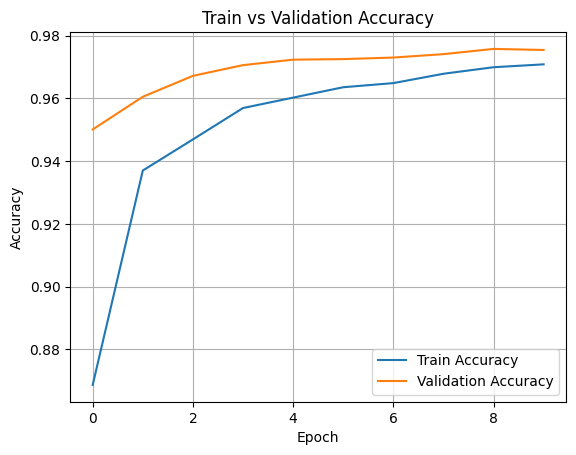

In [ ]:
# enhanced MLP with accuracy
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build model with Dropout
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(
    x_train, y_train_cat,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
 [[40  3]
 [ 1 70]]
ROC-AUC Score: 0.9952505732066819


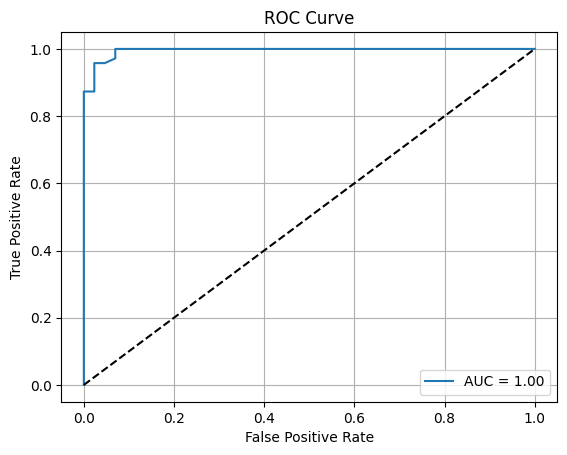

In [ ]:
# day 19 of ML training
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Train classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.2587 - loss: 2.1813 - val_accuracy: 0.3444 - val_loss: 1.8271
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.3664 - loss: 1.7714 - val_accuracy: 0.3572 - val_loss: 1.7728
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.3850 - loss: 1.7211 - val_accuracy: 0.3710 - val_loss: 1.7458
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.3941 - loss: 1.6810 - val_accuracy: 0.4142 - val_loss: 1.6672
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.4008 - loss: 1.6641 - val_accuracy: 0.4157 - val_loss: 1.6478
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.4074 - loss: 1.6541 - val_accuracy: 0.4236 - val_loss: 1.6146
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.4135 - loss: 1.6445 - val_accuracy: 0.4349 - val_loss: 1.5714
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━

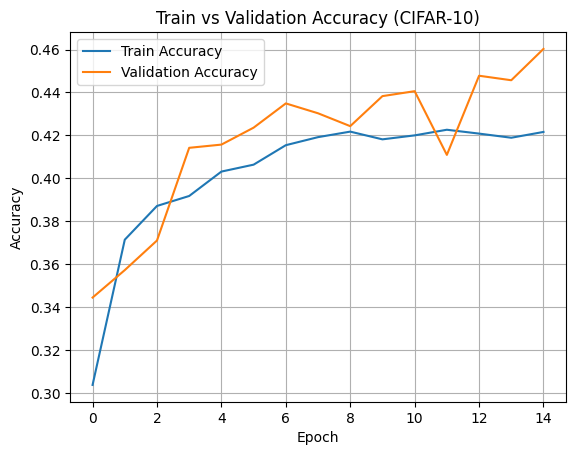

In [ ]:
# mlp enhancement
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build a deeper MLP with Batch Normalization and Dropout
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    Dropout(0.2),

    Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(
    x_train, y_train_cat,
    epochs=15,
    batch_size=64,
    validation_split=0.2
)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy on CIFAR-10: {test_acc:.4f}")

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Train vs Validation Accuracy (CIFAR-10)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 108ms/step - accuracy: 0.2887 - loss: 1.9101 - val_accuracy: 0.5128 - val_loss: 1.3675
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.4930 - loss: 1.4169 - val_accuracy: 0.5848 - val_loss: 1.1806
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 83ms/step - accuracy: 0.5597 - loss: 1.2514 - val_accuracy: 0.5869 - val_loss: 1.1737
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.5912 - loss: 1.1662 - val_accuracy: 0.6371 - val_loss: 1.0439
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.6182 - loss: 1.0886 - val_accuracy: 0.6255 - val_loss: 1.0758
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 89ms/step - accuracy: 0.6361 - loss: 1.0325 - val_accuracy: 0.6649 - val_loss: 0.9681
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 86ms/step - accuracy: 0.6489 - loss: 0.9864 - val_accuracy: 0.6803 - val_loss: 0.9185
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 88ms/step - accuracy: 0.6689 - loss: 0.9415 -

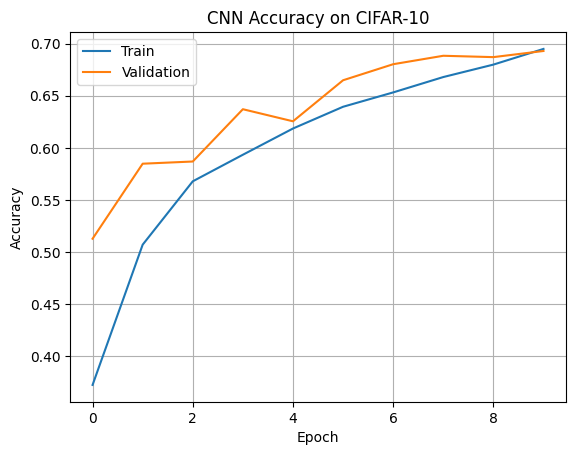

In [ ]:
# Day 18 of ML
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load & preprocess
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile & train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("CNN Accuracy on CIFAR-10")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


🔹 Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

ROC AUC: 0.9977071732721913

🔸 Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

ROC AUC: 0.9952505732066819


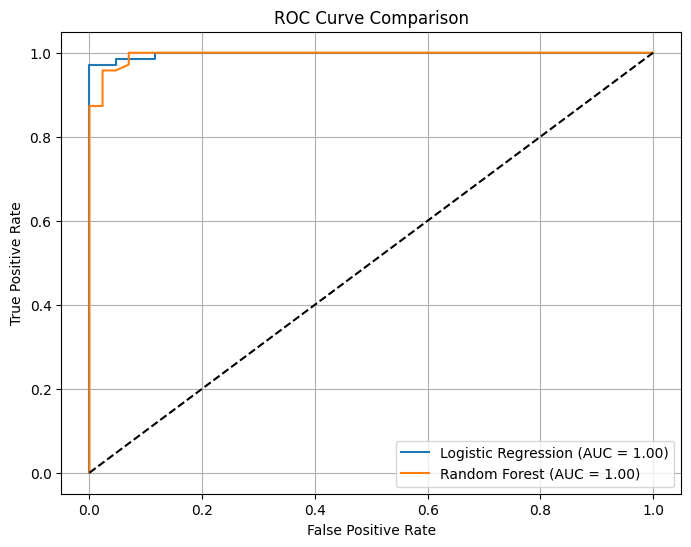

In [ ]:
# Day 19 Ml practise continue
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lr = LogisticRegression(max_iter=10000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train both models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predictions
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)
lr_proba = lr.predict_proba(X_test)[:, 1]
rf_proba = rf.predict_proba(X_test)[:, 1]

# Print metrics
print("🔹 Logistic Regression:")
print(classification_report(y_test, lr_pred))
print("ROC AUC:", roc_auc_score(y_test, lr_proba))

print("\n🔸 Random Forest:")
print(classification_report(y_test, rf_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_proba))

# Plot ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, lr_proba):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


🔹 Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962

ROC AUC: 0.9727243053242681

🔸 Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC: 0.952908497036969


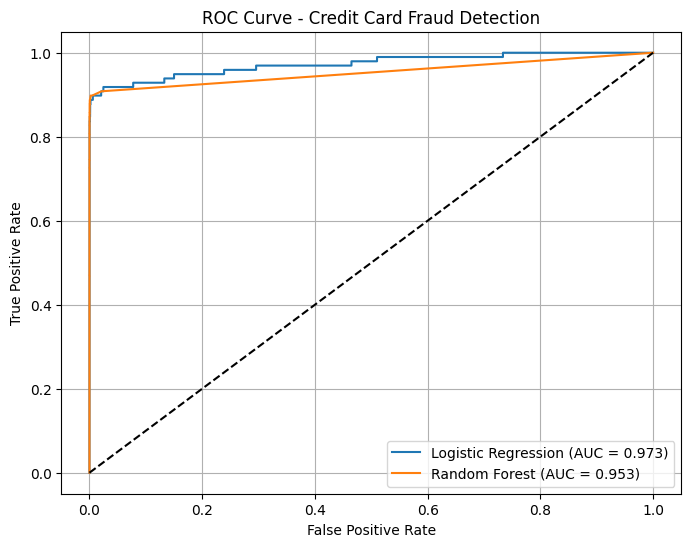

In [ ]:
# detecting the credit card frauds
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load data
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
df = pd.read_csv(url)

# Features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Initialize models
lr = LogisticRegression(max_iter=1000, class_weight='balanced')  # important for imbalance
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predictions
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)
lr_proba = lr.predict_proba(X_test)[:, 1]
rf_proba = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("🔹 Logistic Regression:")
print(classification_report(y_test, lr_pred))
print("ROC AUC:", roc_auc_score(y_test, lr_proba))

print("\n🔸 Random Forest:")
print(classification_report(y_test, rf_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_proba))

# Plot ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, lr_proba):.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_proba):.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Credit Card Fraud Detection")
plt.legend()
plt.grid(True)
plt.show()


0      4
1      4
2      1
3      4
4      3
      ..
173    2
174    2
175    2
176    2
177    2
Name: cluster, Length: 178, dtype: int32


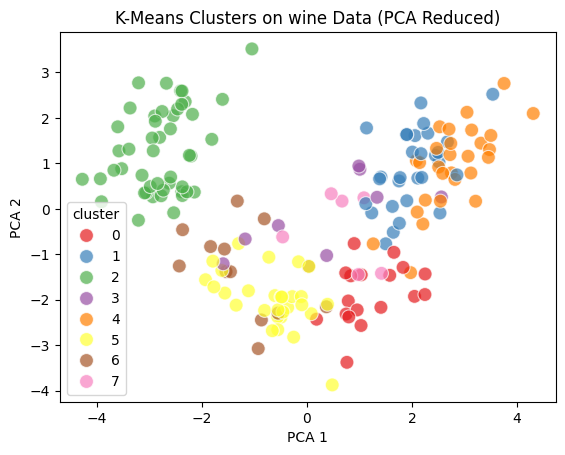

Explained variance ratio: [0.36198848 0.1920749 ]


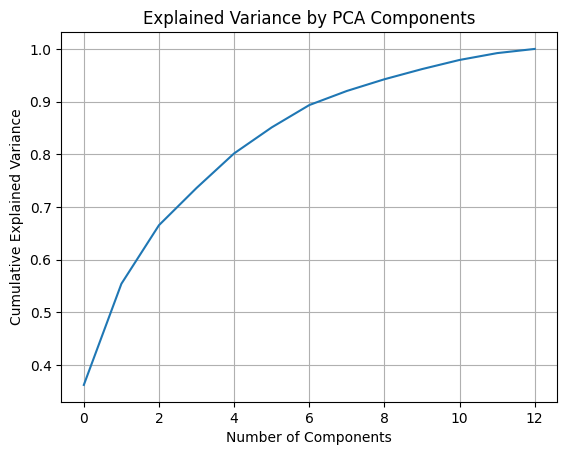

In [ ]:
# 20 day deeper into PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load wine data
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X_scaled)

# Add predicted cluster labels
X['cluster'] = kmeans.labels_
X['actual'] = data.target
pd.crosstab(X['cluster'], X['actual'])

print(X['cluster'])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=X['cluster'],
    palette='Set1',
    s=100,
    alpha=0.7
)
plt.title("K-Means Clusters on wine Data (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

from sklearn.metrics import adjusted_rand_score

# Note: In real unsupervised tasks, you won't have y
adjusted_rand_score(data.target, kmeans.labels_)
print("Explained variance ratio:", pca.explained_variance_ratio_)

pca_all = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca_all.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()




['class_0' 'class_1' 'class_2'] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


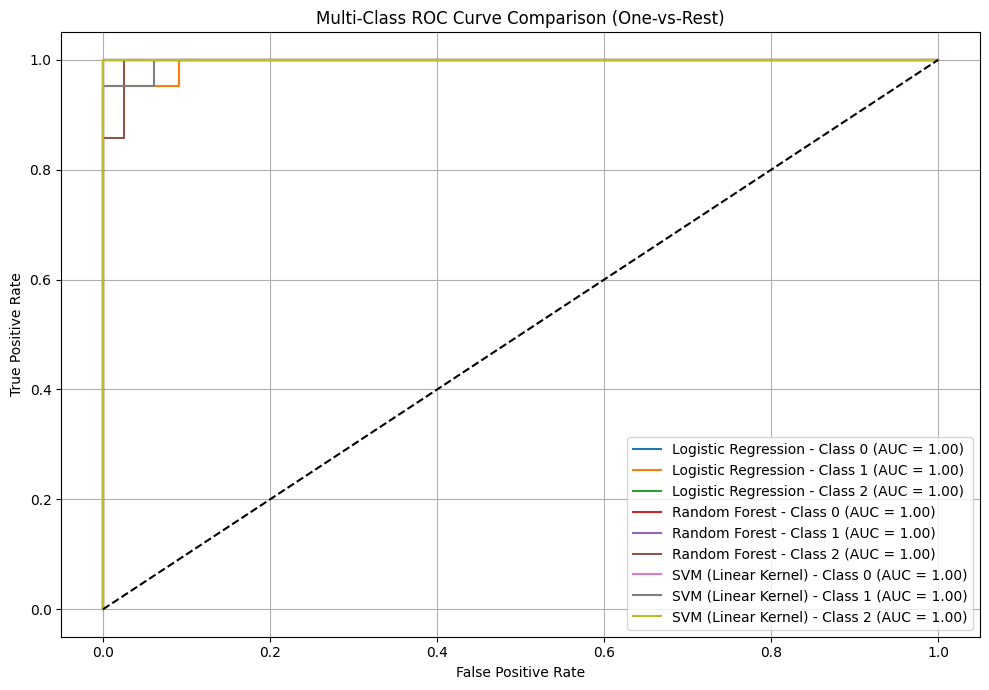


Multi-Class Model Performance Summary:
                 Model  Mean CV Accuracy  Macro AUC
0  Logistic Regression             0.989      0.999
1        Random Forest             0.972      0.999
2  SVM (Linear Kernel)             0.955      0.999


In [ ]:
# day 21
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

# Load data
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target
class_names = wine.target_names
n_classes = len(np.unique(y))

# One-hot encode target for ROC curves
y_bin = label_binarize(y, classes=[0, 1, 2])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X_scaled, y_bin, test_size=0.3, random_state=42)

# Define models
base_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM (Linear Kernel)": SVC(kernel='linear', probability=True)
}

# Evaluation results
results = []
plt.figure(figsize=(10, 7))

for name, base_model in base_models.items():
    model = OneVsRestClassifier(base_model)
    model.fit(X_train, y_train_bin)
    y_score = model.predict_proba(X_test)

    # Compute ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'{name} - Class {i} (AUC = {roc_auc[i]:.2f})')

    # Compute macro-average AUC
    all_auc = list(roc_auc.values())
    macro_auc = np.mean(all_auc)

    # Cross-validation score
    y_flat = np.argmax(y_bin, axis=1)
    cv_acc = cross_val_score(base_model, X_scaled, y_flat, cv=5, scoring='accuracy').mean()

    results.append({
        "Model": name,
        "Mean CV Accuracy": round(cv_acc, 3),
        "Macro AUC": round(macro_auc, 3)
    })

# Finalize ROC plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve Comparison (One-vs-Rest)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Show summary
results_df = pd.DataFrame(results)
print("\nMulti-Class Model Performance Summary:")
print(results_df)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


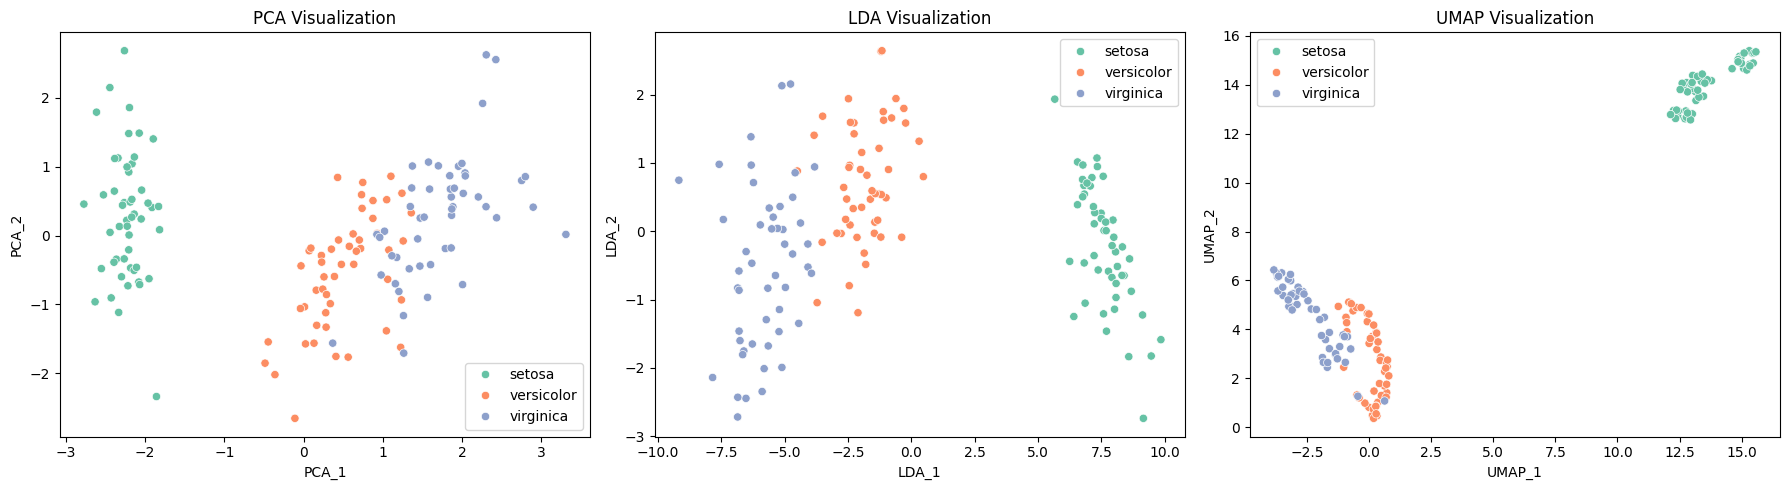

In [ ]:
# day 22 of ML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Try importing UMAP
try:
    import umap
    umap_available = True
except ImportError:
    umap_available = False

# Load and preprocess data
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
X_scaled = StandardScaler().fit_transform(X)

# Apply dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

if umap_available:
    reducer = umap.UMAP(n_components=2, random_state=42)
    X_umap = reducer.fit_transform(X_scaled)

# Prepare DataFrames
df = pd.DataFrame({'target': y, 'target_name': [target_names[i] for i in y]})
results = {'PCA': X_pca, 'LDA': X_lda}
if umap_available:
    results['UMAP'] = X_umap

df_results = {}
for key, value in results.items():
    df_temp = pd.DataFrame(value, columns=[f'{key}_1', f'{key}_2'])
    df_combined = pd.concat([df, df_temp], axis=1)
    df_results[key] = df_combined

# Plot
fig, axes = plt.subplots(1, len(df_results), figsize=(6 * len(df_results), 5))
for ax, (method, df_vis) in zip(axes, df_results.items()):
    sns.scatterplot(x=f"{method}_1", y=f"{method}_2", hue="target_name", data=df_vis, ax=ax, palette="Set2")
    ax.set_title(f"{method} Visualization")
    ax.legend(loc='best')

plt.tight_layout()
plt.show()


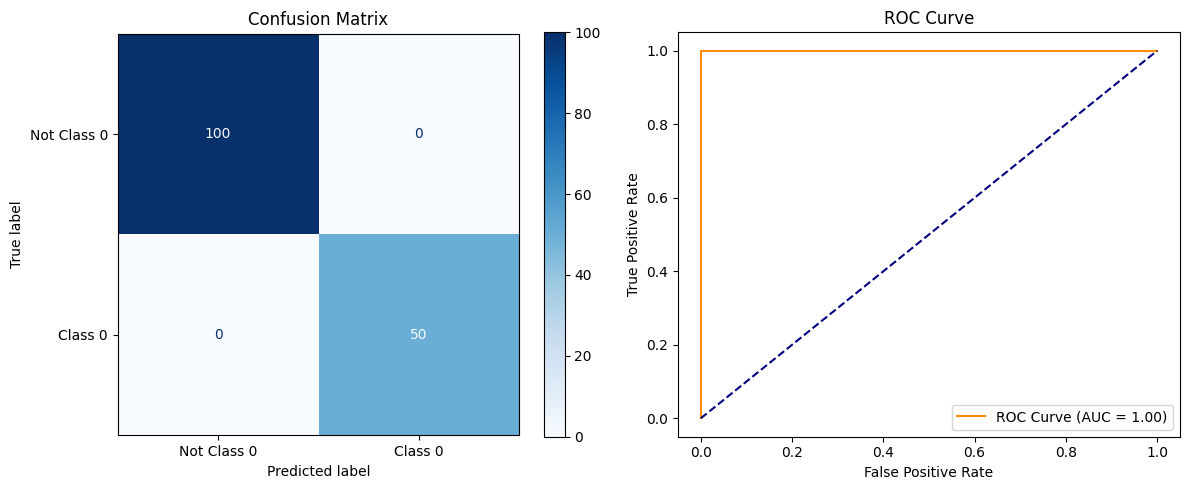

In [ ]:
# ROC curve FP,FN,TP,TN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

# Load data
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # Class 0 vs not Class 0 (binary)

# Scale data
X_scaled = StandardScaler().fit_transform(X)

# Fit model
model = LogisticRegression()
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)
y_proba = model.predict_proba(X_scaled)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Class 0", "Class 0"])

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y, y_proba)
auc = roc_auc_score(y, y_proba)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Confusion Matrix
disp.plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Confusion Matrix")

# Plot ROC Curve
axes[1].plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color='darkorange')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='navy')
axes[1].set_title("ROC Curve")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
!pip install -q pmdarima==2.0.3

Found existing installation: pmdarima 2.0.3
Uninstalling pmdarima-2.0.3:
  Successfully uninstalled pmdarima-2.0.3


In [ ]:
# Day 23 time series ARIMA SARIMA
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Sample time series data
data = {
    'Month': pd.date_range(start='2020-01-01', periods=24, freq='M'),
    'Passengers': [112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118,
                   115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140]
}
df = pd.DataFrame(data)
df.set_index('Month', inplace=True)
ts = df['Passengers']

# Check stationarity
result = adfuller(ts)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Fit ARIMA model
model = ARIMA(ts, order=(1, 1, 1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=12)
plt.plot(ts, label='Original')
plt.plot(pd.date_range(start=ts.index[-1], periods=12, freq='M'), forecast, label='Forecast')
plt.title("ARIMA Forecast")
plt.legend()
plt.show()




ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

<ipython-input-7-7a128bbe802c>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_rng = pd.date_range(start='2020-01', periods=36, freq='M')


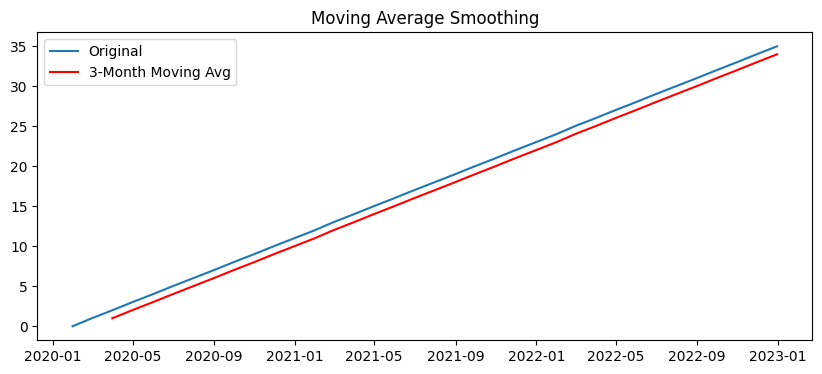

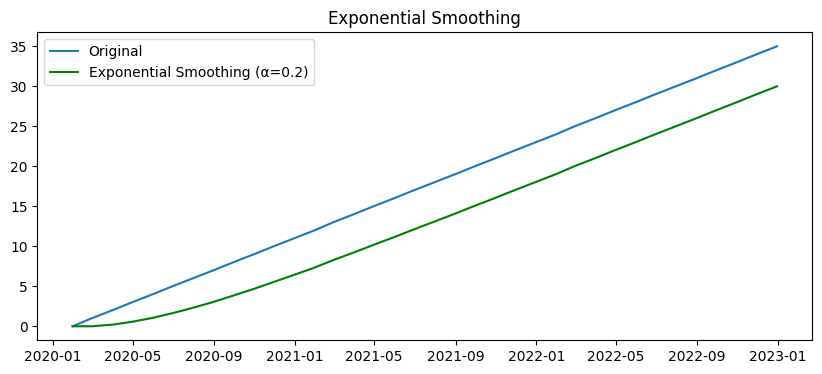

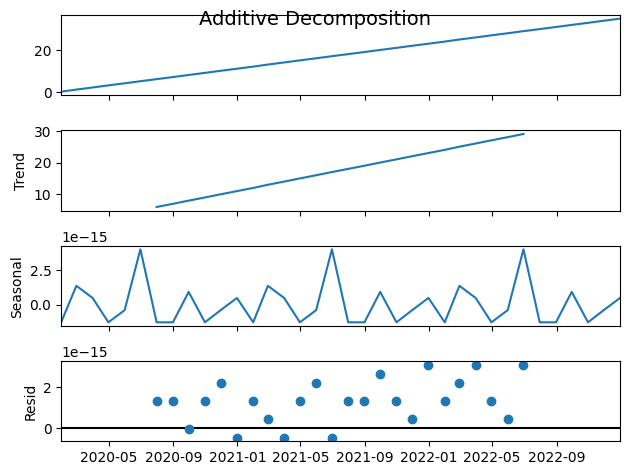

In [ ]:
# Day 24
import pandas as pd
import matplotlib.pyplot as plt

# Sample time series data
date_rng = pd.date_range(start='2020-01', periods=36, freq='M')
ts = pd.Series(range(36), index=date_rng)

# Simple Moving Average (window=3)
ts_ma = ts.rolling(window=3).mean()

plt.figure(figsize=(10, 4))
plt.plot(ts, label='Original')
plt.plot(ts_ma, label='3-Month Moving Avg', color='red')
plt.legend()
plt.title('Moving Average Smoothing')
plt.show()

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(ts).fit(smoothing_level=0.2, optimized=False)
ts_exp = model.fittedvalues

plt.figure(figsize=(10, 4))
plt.plot(ts, label='Original')
plt.plot(ts_exp, label='Exponential Smoothing (α=0.2)', color='green')
plt.legend()
plt.title('Exponential Smoothing')
plt.show()

from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result = seasonal_decompose(ts, model='additive', period=12)

decompose_result.plot()
plt.suptitle("Additive Decomposition", fontsize=14)
plt.show()




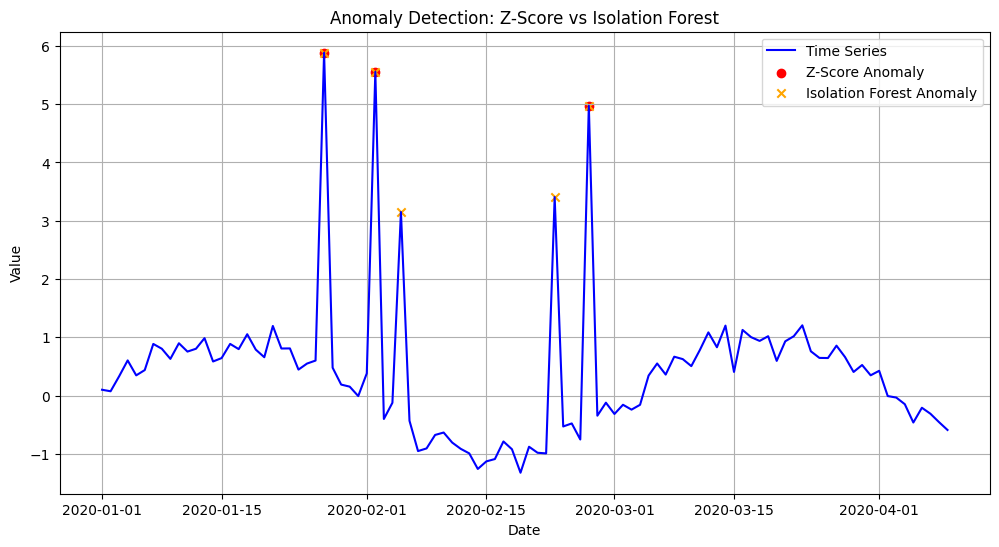

In [ ]:
# Day 25
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore

# Step 1: Generate synthetic time series data
np.random.seed(42)
date_rng = pd.date_range(start='2020-01-01', periods=100, freq='D')
values = np.sin(np.linspace(0, 10, 100)) + np.random.normal(0, 0.2, 100)

# Inject anomalies
anomaly_indices = np.random.choice(range(20, 80), size=5, replace=False)
values[anomaly_indices] += np.random.normal(5, 1, size=5)

df_anomaly = pd.DataFrame({'Date': date_rng, 'Value': values})
df_anomaly.set_index('Date', inplace=True)

# Step 2: Z-Score Anomaly Detection
df_anomaly['Z_Score'] = zscore(df_anomaly['Value'])
df_anomaly['Anomaly_Z'] = df_anomaly['Z_Score'].apply(lambda x: 1 if np.abs(x) > 3 else 0)

# Step 3: Isolation Forest Anomaly Detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df_anomaly['Anomaly_IF'] = iso_forest.fit_predict(df_anomaly[['Value']])
df_anomaly['Anomaly_IF'] = df_anomaly['Anomaly_IF'].apply(lambda x: 1 if x == -1 else 0)

# Step 4: Plot results
plt.figure(figsize=(12, 6))
plt.plot(df_anomaly.index, df_anomaly['Value'], label='Time Series', color='blue')

# Z-Score Anomalies
plt.scatter(df_anomaly[df_anomaly['Anomaly_Z'] == 1].index,
            df_anomaly[df_anomaly['Anomaly_Z'] == 1]['Value'],
            color='red', label='Z-Score Anomaly', marker='o')

# Isolation Forest Anomalies
plt.scatter(df_anomaly[df_anomaly['Anomaly_IF'] == 1].index,
            df_anomaly[df_anomaly['Anomaly_IF'] == 1]['Value'],
            color='orange', label='Isolation Forest Anomaly', marker='x')

plt.title('Anomaly Detection: Z-Score vs Isolation Forest')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()




228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


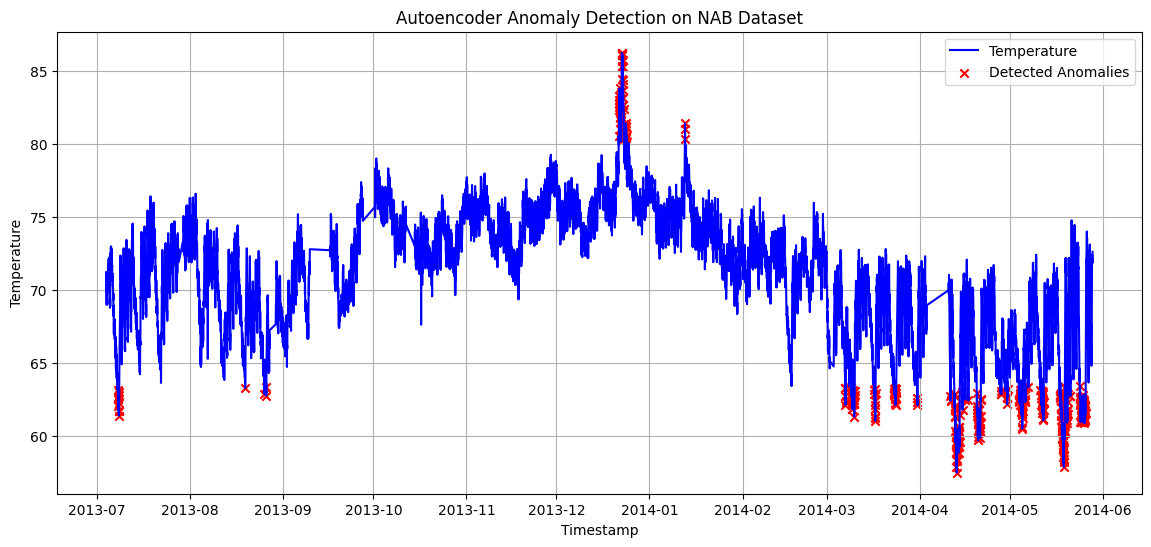

In [ ]:
# Anomy detection
# Step 1: Load real-world dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Load NAB dataset
url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/ambient_temperature_system_failure.csv"
df = pd.read_csv(url)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Scale values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df['value'].values.reshape(-1, 1))

# Train/test split
X_train, X_test = train_test_split(scaled_data, test_size=0.2, shuffle=False)

# Build autoencoder model
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,))
encoded = Dense(8, activation='relu')(inputs)
encoded = Dense(4, activation='relu')(encoded)
decoded = Dense(8, activation='relu')(encoded)
outputs = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

# Predict and calculate reconstruction error
X_pred = autoencoder.predict(scaled_data)
mse = np.mean(np.power(scaled_data - X_pred, 2), axis=1)

# Detect anomalies (top 5% MSE)
threshold = np.percentile(mse, 95)
anomalies = mse > threshold

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['value'], label='Temperature', color='blue')
plt.scatter(df.index[anomalies], df['value'][anomalies], color='red', label='Detected Anomalies', marker='x')
plt.title("Autoencoder Anomaly Detection on NAB Dataset")
plt.xlabel("Timestamp")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.show()


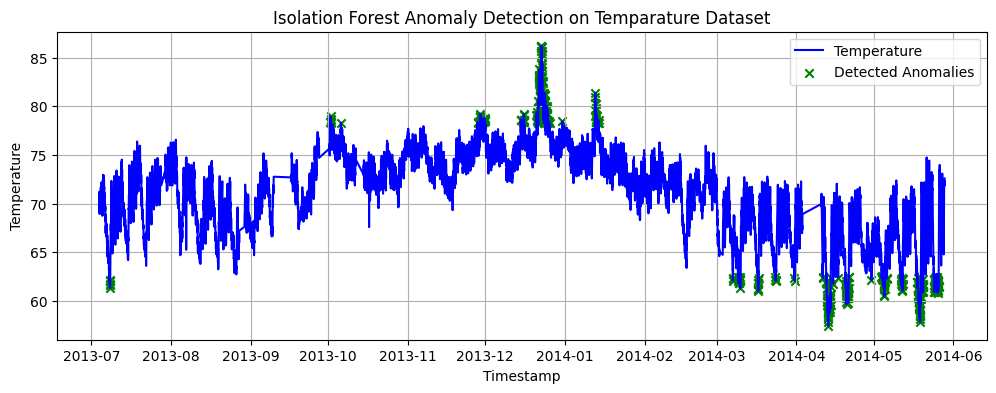

In [ ]:
# example of anamoly detection using isolation forest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore

df = pd.read_csv("https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/ambient_temperature_system_failure.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Step 3: Isolation Forest Anomaly Detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly_IF'] = iso_forest.fit_predict(df[['value']])
df['Anomaly_IF'] = df['Anomaly_IF'].apply(lambda x: 1 if x == -1 else 0)

# above example with isolation forest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore

df = pd.read_csv("https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/ambient_temperature_system_failure.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Step 3: Isolation Forest Anomaly Detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly_IF'] = iso_forest.fit_predict(df[['value']])
df['Anomaly_IF'] = df['Anomaly_IF'].apply(lambda x: 1 if x == -1 else 0)

# plot
plt.figure(figsize=(12,4))
plt.plot(df.index, df['value'], label='Temperature', color='blue')
plt.scatter(df.index[df['Anomaly_IF'] == 1], df['value'][df['Anomaly_IF'] == 1], color='green', label='Detected Anomalies', marker='x')
plt.title("Isolation Forest Anomaly Detection on Temparature Dataset")
plt.xlabel("Timestamp")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.show()

228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


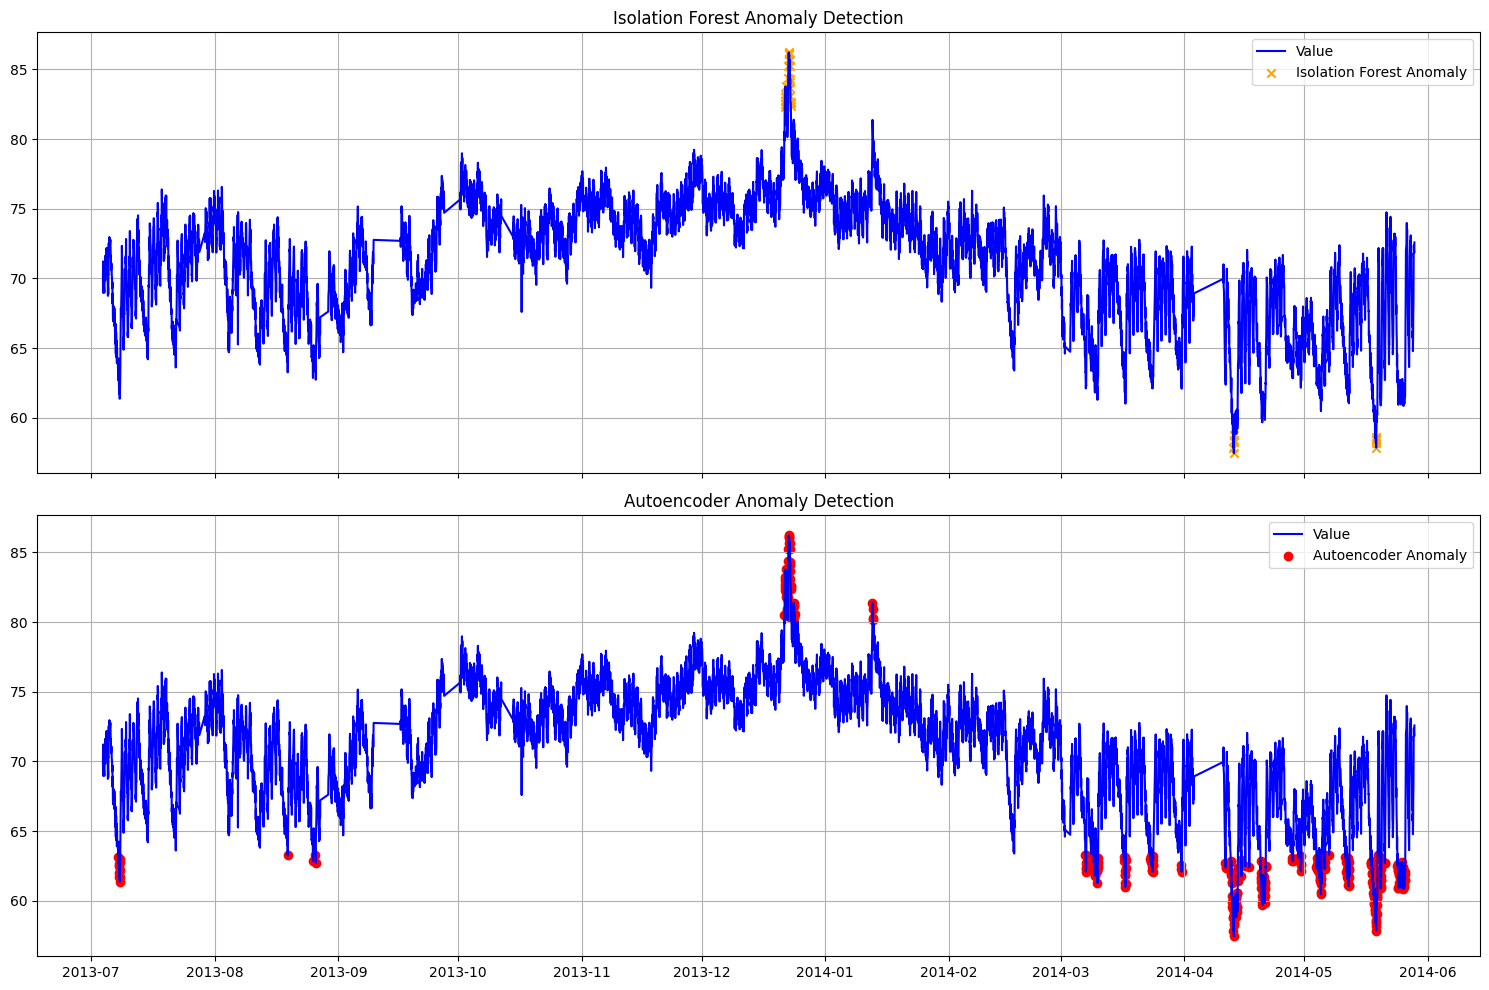

In [ ]:
# comparison of isolation forest with auto encoders
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Load NAB data
url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/ambient_temperature_system_failure.csv"
df = pd.read_csv(url)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Scale
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df['value'].values.reshape(-1, 1))

# ========== Isolation Forest ==========
iso_model = IsolationForest(contamination=0.05, random_state=42)
iso_preds = iso_model.fit_predict(scaled_data)
iso_anomalies = iso_preds == -1

# ========== Autoencoder ==========
X_train, _ = train_test_split(scaled_data, test_size=0.2, shuffle=False)

input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,))
encoded = Dense(8, activation='relu')(inputs)
encoded = Dense(4, activation='relu')(encoded)
decoded = Dense(8, activation='relu')(encoded)
outputs = Dense(input_dim, activation='sigmoid')(decoded)
autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

# Predict & reconstruction error
X_pred = autoencoder.predict(scaled_data)
recon_error = np.mean(np.square(scaled_data - X_pred), axis=1)
threshold = np.percentile(recon_error, 95)
ae_anomalies = recon_error > threshold

# ========== Plot Comparison ==========
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Isolation Forest
ax[0].plot(df.index, df['value'], label='Value', color='blue')
ax[0].scatter(df.index[iso_anomalies], df['value'][iso_anomalies], color='orange', label='Isolation Forest Anomaly', marker='x')
ax[0].set_title('Isolation Forest Anomaly Detection')
ax[0].legend()
ax[0].grid(True)

# Autoencoder
ax[1].plot(df.index, df['value'], label='Value', color='blue')
ax[1].scatter(df.index[ae_anomalies], df['value'][ae_anomalies], color='red', label='Autoencoder Anomaly', marker='o')
ax[1].set_title('Autoencoder Anomaly Detection')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - loss: 0.0514 - val_loss: 0.0064
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0033 - val_loss: 0.0048
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0023 - val_loss: 0.0034
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0022 - val_loss: 0.0032
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0022 - val_loss: 0.0031
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0021 - val_loss: 0.0030
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0017 - val_loss: 0.0025
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0017 - val_loss: 0.0025
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0

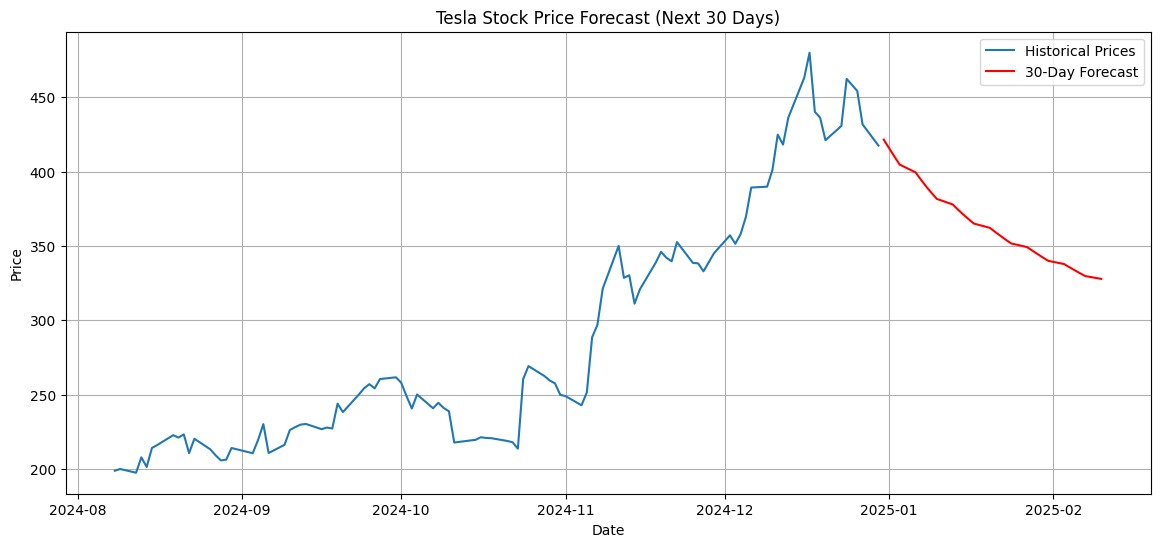

In [ ]:
# Time series for stock prediction
# Install required package (only if not available)
#!pip install yfinance --quiet

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load Tesla stock data
df = yf.download('TSLA', start='2020-01-01', end='2024-12-31')
data = df[['Close']]  # Use closing prices only

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Prepare sequences
sequence_length = 60
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))  # (samples, timesteps, features)

# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict future 30 days
last_sequence = scaled_data[-sequence_length:]
predictions = []

for _ in range(30):
    input_seq = last_sequence.reshape(1, sequence_length, 1)
    pred = model.predict(input_seq)[0, 0]
    predictions.append(pred)
    last_sequence = np.append(last_sequence[1:], [[pred]], axis=0)

# Inverse scale
future_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Plot
plt.figure(figsize=(14, 6))
plt.plot(data.index[-100:], data['Close'].values[-100:], label='Historical Prices')
future_index = pd.date_range(start=data.index[-1], periods=31, freq='B')[1:]
plt.plot(future_index, future_prices, color='red', label='30-Day Forecast')
plt.title('Tesla Stock Price Forecast (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# day 26
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

# Grid Search
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Best model
print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

# cross validation
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut, cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

model = LogisticRegression(max_iter=1000)

# K-Fold
kf = KFold(n_splits=5)
kf_score = cross_val_score(model, X, y, cv=kf)
print("K-Fold Mean Accuracy:", np.mean(kf_score))

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5)
skf_score = cross_val_score(model, X, y, cv=skf)
print("Stratified K-Fold Mean Accuracy:", np.mean(skf_score))

# Leave-One-Out (⚠️ very slow)
# loo = LeaveOneOut()
# loo_score = cross_val_score(model, X, y, cv=loo)
# print("LOOCV Mean Accuracy:", np.mean(loo_score))



Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

K-Fold Mean Accuracy: 0.9490141282409563


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stratified K-Fold Mean Accuracy: 0.9525694767893185


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Day 27
import joblib
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Train model
iris = load_iris()
model = RandomForestClassifier()
model.fit(iris.data, iris.target)

# Save model
joblib.dump(model, "iris_model.pkl")

# Load model
loaded_model = joblib.load("iris_model.pkl")
print(loaded_model.predict([iris.data[0]]))

# flask API
# app.py
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)
model = joblib.load("iris_model.pkl")

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    features = np.array(data['features']).reshape(1, -1)
    prediction = model.predict(features)[0]
    return jsonify({'prediction': int(prediction)})

if __name__ == '__main__':
    app.run(debug=True)

import requests

url = "http://127.0.0.1:5000/predict"
data = {"features": [5.1, 3.5, 1.4, 0.2]}  # Example Iris sample
response = requests.post(url, json=data)
print("Prediction:", response.json())



[0]
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
# Day 27 NLP fundamentals
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Download NLTK data
nltk.download("stopwords")

# Load Dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_table(url, header=None, names=['label', 'message'])

# Encode labels with separate terms to differentiate them
df['label'] = df['label'].map({'spam': 0, 'ham': 1})
print(df.head())

# Preprocess Text
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned'] = df['message'].apply(preprocess)

# Vectorize
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['cleaned'])
y = df['label']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   label                                            message
0      1  Go until jurong point, crazy.. Available only ...
1      1                      Ok lar... Joking wif u oni...
2      0  Free entry in 2 a wkly comp to win FA Cup fina...
3      1  U dun say so early hor... U c already then say...
4      1  Nah I don't think he goes to usf, he lives aro...
[[111  38]
 [  1 965]]
              precision    recall  f1-score   support

           0       0.99      0.74      0.85       149
           1       0.96      1.00      0.98       966

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115



OSError: No such file or directory: '/root/nltk_data/corpora/stopwords/hindi'

<ipython-input-23-d63679ca42b0>:26: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-d63679ca42b0>:26: UserWarning: Glyph 128233 (\N{ENVELOPE WITH DOWNWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128233 (\N{ENVELOPE WITH DOWNWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


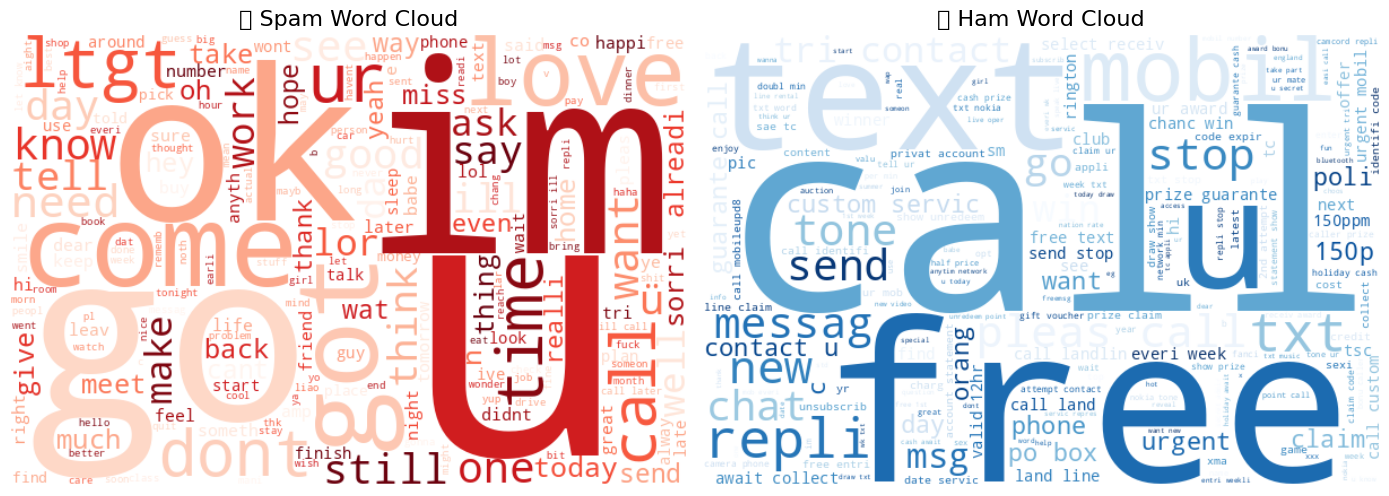

In [ ]:
# another example of cloud words
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate messages by class
spam_text = df[df['label'] == 1]['cleaned'].str.cat(sep=' ')
ham_text = df[df['label'] == 0]['cleaned'].str.cat(sep=' ')

# Generate WordClouds
spam_wc = WordCloud(width=600, height=400, background_color='white', colormap='Reds').generate(spam_text)
ham_wc = WordCloud(width=600, height=400, background_color='white', colormap='Blues').generate(ham_text)

# Plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('🚫 Spam Word Cloud', fontsize=16)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wc, interpolation='bilinear')
plt.title('📩 Ham Word Cloud', fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()



In [ ]:
# language detect
#!pip install langdetect nltk

from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0  # Ensure consistent results

def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer
import nltk
nltk.download('stopwords')

def preprocess_text(text):
    lang = detect_language(text)
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)

    words = text.split()

    if lang == 'en':
        stop_words = set(stopwords.words('english'))
        stemmer = PorterStemmer()

    elif lang == 'es':
        stop_words = set(stopwords.words('spanish'))
        stemmer = SnowballStemmer('spanish')
    else:
        stop_words = set()
        stemmer = lambda x: x  # No stemming

    filtered = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(filtered), lang

texts = [
    "This is a great product!",         # English
    "यह एक शानदार उत्पाद है।",           # Hindi
    "¡Este es un gran producto!",      # Spanish
    "Bonjour, comment ça va?"          # French
]

for text in texts:
    cleaned, lang = preprocess_text(text)
    print(f"[{lang.upper()}] Original: {text}\n→ Cleaned: {cleaned}\n")



[EN] Original: This is a great product!
→ Cleaned: great product



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


AttributeError: 'function' object has no attribute 'stem'

In [ ]:
# language detect
#!pip install langdetect nltk

from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0  # Ensure consistent results

def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer
import nltk
nltk.download('stopwords')

# Define a default stemmer class that just returns the word
class NoOpStemmer:
    def stem(self, word):
        return word

def preprocess_text(text):
    lang = detect_language(text)
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)

    words = text.split()

    if lang == 'en':
        stop_words = set(stopwords.words('english'))
        stemmer = PorterStemmer()

    elif lang == 'es':
        stop_words = set(stopwords.words('spanish'))
        stemmer = SnowballStemmer('spanish')
    else:
        # Use the default stemmer for other languages
        stop_words = set() # Or load stop words for the detected language if available
        stemmer = NoOpStemmer()

    filtered = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(filtered), lang

texts = [
    "This is a great product!",         # English
    "यह एक शानदार उत्पाद है।",           # Hindi
    "¡Este es un gran producto!",      # Spanish
    "Bonjour, comment ça va?"          # French
]

for text in texts:
    cleaned, lang = preprocess_text(text)
    print(f"[{lang.upper()}] Original: {text}\n→ Cleaned: {cleaned}\n")

[EN] Original: This is a great product!
→ Cleaned: great product

[HI] Original: यह एक शानदार उत्पाद है।
→ Cleaned: यह एक श नद र उत प द ह

[ES] Original: ¡Este es un gran producto!
→ Cleaned: gran product

[FR] Original: Bonjour, comment ça va?
→ Cleaned: bonjour comment ça va



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# deploying as an api
from flask import Flask, request, jsonify
from langdetect import detect, DetectorFactory
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer
import re

app = Flask(__name__)
DetectorFactory.seed = 0
nltk.download('stopwords')

def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

def preprocess_text(text):
    lang = detect_language(text)
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)

    words = text.split()

    if lang == 'en':
        stop_words = set(stopwords.words('english'))
        stemmer = PorterStemmer()
    elif lang == 'hi':
        stop_words = set(stopwords.words('hindi'))
        stemmer = SnowballStemmer('hindi')
    elif lang == 'es':
        stop_words = set(stopwords.words('spanish'))
        stemmer = SnowballStemmer('spanish')
    else:
        stop_words = set()
        stemmer = lambda x: x  # No stemming

    filtered = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(filtered), lang

@app.route('/preprocess', methods=['POST'])
def preprocess():
    data = request.get_json()
    text = data.get('text', '')
    cleaned, lang = preprocess_text(text)
    return jsonify({
        'original': text,
        'cleaned': cleaned,
        'language': lang
    })

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


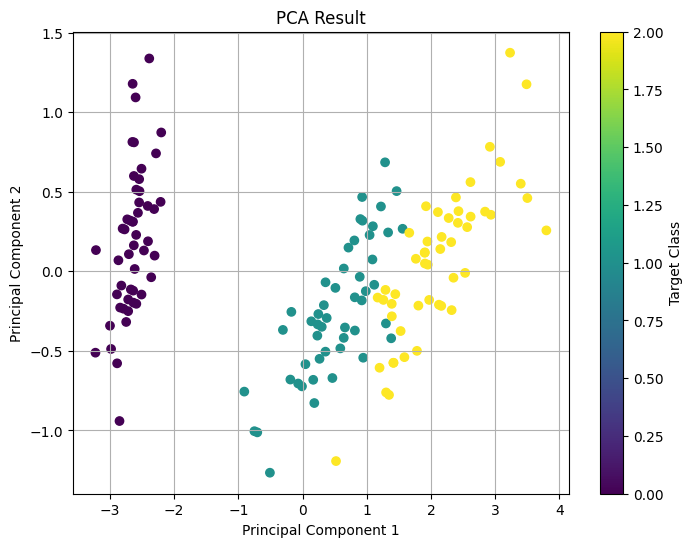

Explained variance ratio: [0.92461872 0.05306648]


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


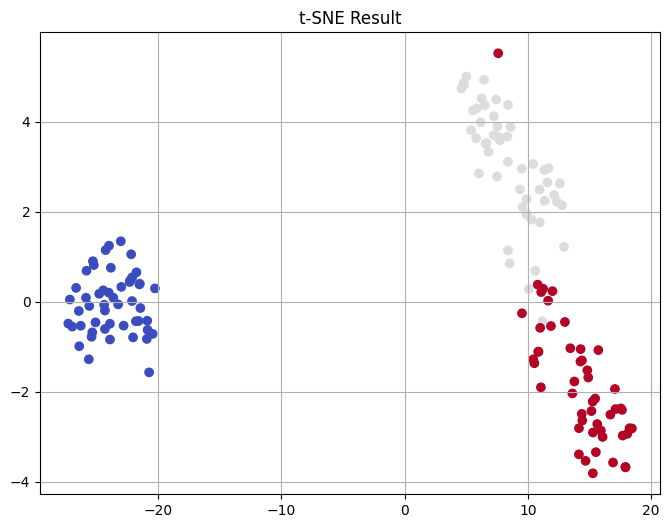

In [ ]:
# day 28
from sklearn.datasets import load_iris
import pandas as pd

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
labels = data.target

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
plt.title("PCA Result")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Target Class')
plt.grid(True)
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)


tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(df)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='coolwarm')
plt.title("t-SNE Result")
plt.grid(True)
plt.show()



Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8402 - loss: 0.5265 - val_accuracy: 0.9557 - val_loss: 0.1523
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9543 - loss: 0.1532 - val_accuracy: 0.9673 - val_loss: 0.1102
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9653 - loss: 0.1131 - val_accuracy: 0.9627 - val_loss: 0.1269
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9703 - loss: 0.0966 - val_accuracy: 0.9705 - val_loss: 0.0999
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9752 - loss: 0.0797 - val_accuracy: 0.9724 - val_loss: 0.0961
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9774 - loss: 0.0705 - val_accuracy: 0.9738 - val_loss: 0.0907
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9806 - loss: 0.0614 - val_accuracy: 0.9756 - val_loss: 0.0875
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9814 - loss: 0.0

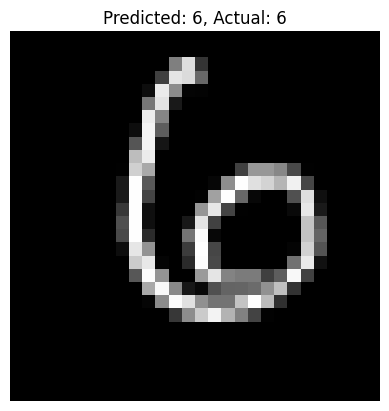

In [10]:
# Deep dive neural networks with example
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data (0–1 range)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten 28x28 images into 784-d vectors
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

# evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

# visualise

predictions = model.predict(x_test)

def show_prediction(i):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()

show_prediction(100)  # Try different indices

